# 问题情境

文理分科是在中国大陆、香港、台湾等等世界上部分国家和地区所实行的一种教育制度，即将教学课程分为文科和理科让学生做出选择后进行分别教育。即便很多省市取消文理分科，其实也还是有所侧重，尤其是面对高考时仍须做出抉择，要么偏文、要么偏理。对于学生选文还是选理，对于学生乃至家长、老师都是一个相对艰难的抉择。<br>
<img src="figtabs/ch5/arts_and_sciences_division.png" align="center" width=50% height=50% />

偏文还是偏理，这里边涉及的因素当然很多，比如兴趣爱好等。本实验主要从数据本身出发，找到性别、各科成绩与文理科之间的关系。为学生文理分科的选择提供一些定量依据。  
> 《R语言数据分析》课程通过这一份数据贯穿始终。感兴趣的同学可以对照R和Python的不同实现方式。

# 准备工作

## 加载相关模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 绘图设置

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
plt.style.use('seaborn-darkgrid')
sns.set_style('darkgrid')
favorable_figsize = (10, 6)
%matplotlib inline

设定随机状态种子，结果可复现：

In [4]:
rng = np.random.RandomState(2012)

解决中文显示问题:

In [5]:
plt.rcParams['font.sans-serif'] = ['FangSong']  # 制定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

本实验将大量采用sklern模块。由于sklearn新旧版本0.18.0前后版本差别较大，请确认一下目前所用的版本。

In [6]:
import sklearn
sklearn.__version__

'0.22.1'

In [7]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
Version(sklearn_version)

LooseVersion ('0.22.1')

忽略掉一些警告，保持界面整洁：

In [8]:
import warnings
warnings.filterwarnings("ignore")

# 数据读入

## 读取CSV文件

我们的数据还是存在csv文件中： CSV, the king of tabular file formats

In [9]:
scores = pd.read_csv("datasets/scores/scores_en.csv",
                      encoding='utf-8',
                     sep=',',
                      engine='python')

In [10]:
scores.shape

(775, 13)

In [11]:
scores.head()

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
0,zhou_li,1101,nv,94,82,96,97,97,98,95,94,88,wen_ke
1,shang_hai_meng,1101,NaN,87,94,89,95,94,94,90,90,89,wen_ke
2,shu_jiang_hui,1101,NaN,92,79,86,98,95,96,89,94,87,wen_ke
3,weng_ke,1101,nv,91,84,96,93,97,94,82,90,83,wen_ke
4,qi_jiang,1101,NaN,85,92,82,93,87,88,95,94,93,wen_ke


In [12]:
scores.iloc[1:10, :].to_markdown()

'|    | xm             |   bj | xb   |   yw |   sx |   wy |   zz |   ls |   dl |   wl |   hx |   sw | wlfk   |\n|---:|:---------------|-----:|:-----|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|:-------|\n|  1 | shang_hai_meng | 1101 | nan  |   87 |   94 |   89 |   95 |   94 |   94 |   90 |   90 |   89 | wen_ke |\n|  2 | shu_jiang_hui  | 1101 | nan  |   92 |   79 |   86 |   98 |   95 |   96 |   89 |   94 |   87 | wen_ke |\n|  3 | weng_ke        | 1101 | nv   |   91 |   84 |   96 |   93 |   97 |   94 |   82 |   90 |   83 | wen_ke |\n|  4 | qi_jiang       | 1101 | nan  |   85 |   92 |   82 |   93 |   87 |   88 |   95 |   94 |   93 | wen_ke |\n|  5 | chen_rong      | 1101 | nv   |   92 |   82 |   85 |   91 |   90 |   92 |   82 |   98 |   90 | wen_ke |\n|  6 | mu_ling_li     | 1101 | nv   |   88 |   72 |   86 |   94 |   87 |   88 |   89 |   98 |   94 | wen_ke |\n|  7 | wei_yong_jie   | 1101 | nan  |   81 |   89 |   87 |   97 |   94 |   96 |   81 |   88 |   83 | wen_ke |\n

|    | xm             |   bj | xb   |   yw |   sx |   wy |   zz |   ls |   dl |   wl |   hx |   sw | wlfk   |
|---:|:---------------|-----:|:-----|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|:-------|
|  1 | shang_hai_meng | 1101 | nan  |   87 |   94 |   89 |   95 |   94 |   94 |   90 |   90 |   89 | wen_ke |
|  2 | shu_jiang_hui  | 1101 | nan  |   92 |   79 |   86 |   98 |   95 |   96 |   89 |   94 |   87 | wen_ke |
|  3 | weng_ke        | 1101 | nv   |   91 |   84 |   96 |   93 |   97 |   94 |   82 |   90 |   83 | wen_ke |
|  4 | qi_jiang       | 1101 | nan  |   85 |   92 |   82 |   93 |   87 |   88 |   95 |   94 |   93 | wen_ke |
|  5 | chen_rong      | 1101 | nv   |   92 |   82 |   85 |   91 |   90 |   92 |   82 |   98 |   90 | wen_ke |
|  6 | mu_ling_li     | 1101 | nv   |   88 |   72 |   86 |   94 |   87 |   88 |   89 |   98 |   94 | wen_ke |
|  7 | wei_yong_jie   | 1101 | nan  |   81 |   89 |   87 |   97 |   94 |   96 |   81 |   88 |   83 | wen_ke |
|  8 | gong_lan_xiu   | 1101 | nv   |   88 |   77 |   95 |   94 |   84 |   94 |   87 |   94 |   82 | wen_ke |
|  9 | shu_ya         | 1101 | nv   |   94 |   81 |   88 |   91 |   85 |   98 |   81 |   88 |   88 | wen_ke |

In [13]:
scores.head()

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
0,zhou_li,1101,nv,94,82,96,97,97,98,95,94,88,wen_ke
1,shang_hai_meng,1101,NaN,87,94,89,95,94,94,90,90,89,wen_ke
2,shu_jiang_hui,1101,NaN,92,79,86,98,95,96,89,94,87,wen_ke
3,weng_ke,1101,nv,91,84,96,93,97,94,82,90,83,wen_ke
4,qi_jiang,1101,NaN,85,92,82,93,87,88,95,94,93,wen_ke


## 读取R文件

考虑到有部分小伙伴选修过《R语言数据分析》课程，数据可能另存为rda格式。Python直接读取rda格式也可以：

In [14]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()
readRDS = robjects.r['readRDS']
scores_frm_R = readRDS("datasets/scores/scores.rds")

In [15]:
scores_frm_R

xm,bj,xb,...,hx,sw,wlfk
'周黎',1101.000000,'女',...,94.000000,88.000000,'文科'
'汤海明',1101.000000,'男',...,90.000000,89.000000,'文科'
'舒江辉',1101.000000,'男',...,94.000000,87.000000,'文科'
'翁柯',1101.000000,'女',...,90.000000,83.000000,'文科'
...,...,...,...,...,...,...
'应上清',1115.000000,'男',...,88.000000,82.000000,'理科'
'徐宏平',1115.000000,'男',...,64.000000,75.000000,'理科'
'昌肖峰',1115.000000,'男',...,68.000000,74.000000,'理科'
'郑慕海',1115.000000,'男',...,58.000000,55.000000,'理科'


当然，如果熟悉R的话，以下方式更加加单：

In [16]:
%load_ext rpy2.ipython

In [17]:
%%R -o cjb
load("datasets/scores/cjb.rda")

注意-o不能少，否则后续cell中使用不了cjb这一对象。  
一旦读入之后，自然可以使用cjb

In [18]:
cjb

xm,bj,xb,...,hx,sw,wlfk
'周黎',1101.000000,'女',...,94.000000,88.000000,'文科'
'汤海明',1101.000000,'男',...,90.000000,89.000000,'文科'
'舒江辉',1101.000000,'男',...,94.000000,87.000000,'文科'
'翁柯',1101.000000,'女',...,90.000000,83.000000,'文科'
...,...,...,...,...,...,...
'应上清',1115.000000,'男',...,88.000000,82.000000,'理科'
'徐宏平',1115.000000,'男',...,64.000000,75.000000,'理科'
'昌肖峰',1115.000000,'男',...,68.000000,74.000000,'理科'
'郑慕海',1115.000000,'男',...,58.000000,55.000000,'理科'


当然也可以尝试其他一些R代码：

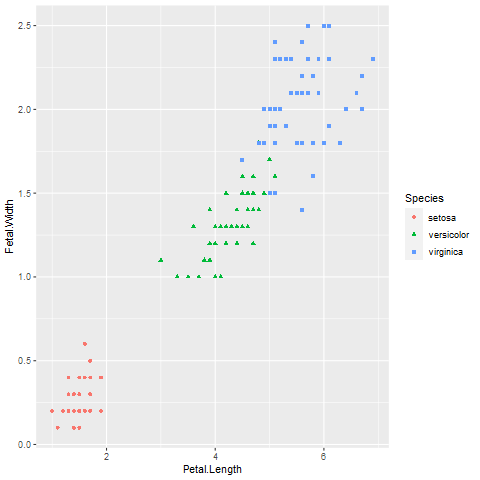

In [19]:
%%R
library(ggplot2)
ggplot(iris, aes(x=Petal.Length, y=Petal.Width, colour=Species, shape=Species)) +
    geom_point()

## 读取Excel文件

In [20]:
scores = pd.read_excel("datasets/scores/scores_en.xlsx")
scores.shape

(775, 13)

In [21]:
scores.info

<bound method DataFrame.info of                   xm    bj   xb  yw  sx  wy  zz   ls  dl  wl  hx  sw    wlfk
0            zhou_li  1101   nv  94  82  96  97   97  98  95  94  88  wen_ke
1     shang_hai_meng  1101  NaN  87  94  89  95   94  94  90  90  89  wen_ke
2      shu_jiang_hui  1101  NaN  92  79  86  98   95  96  89  94  87  wen_ke
3            weng_ke  1101   nv  91  84  96  93   97  94  82  90  83  wen_ke
4           qi_jiang  1101  NaN  85  92  82  93   87  88  95  94  93  wen_ke
..               ...   ...  ...  ..  ..  ..  ..  ...  ..  ..  ..  ..     ...
770      tan_guan_fa  1115  NaN  79  78  70  83   86  86  76  78  70   li_ke
771  ying_shang_qing  1115  NaN  87  63  55  93  100  94  43  88  82   li_ke
772     xu_hong_beng  1115  NaN  85  59  89  80   85  82  61  64  75   li_ke
773  chang_xiao_feng  1115  NaN  81  62  76  89   76  91  49  68  74   li_ke
774     zheng_mu_hai  1115  NaN  72  59  82  92   85  82  59  58  55   li_ke

[775 rows x 13 columns]>

读入数据，并进行查看：

In [22]:
scores = pd.read_excel("datasets/scores/scores_en.xlsx")
scores.shape

(775, 13)

In [23]:
scores.columns

Index(['xm', 'bj', 'xb', 'yw', 'sx', 'wy', 'zz', 'ls', 'dl', 'wl', 'hx', 'sw',
       'wlfk'],
      dtype='object')

这份数据包含775行、13列，各列具体含义如下：  
* xm:姓名
* bj:班级
* xb:性别
* yw:语文
* sx:数学
* wy:外语
* zz:政治
* ls:历史
* dl:地理
* hx:化学
* sw:生物
* wlfk:文理分科

当然，更直观的方式，是直接查看部分数据：

In [24]:
scores.head()

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
0,zhou_li,1101,nv,94,82,96,97,97,98,95,94,88,wen_ke
1,shang_hai_meng,1101,NaN,87,94,89,95,94,94,90,90,89,wen_ke
2,shu_jiang_hui,1101,NaN,92,79,86,98,95,96,89,94,87,wen_ke
3,weng_ke,1101,nv,91,84,96,93,97,94,82,90,83,wen_ke
4,qi_jiang,1101,NaN,85,92,82,93,87,88,95,94,93,wen_ke


# 数据预处理

可能有小伙伴已经发现了，其中有NaN字样，显然并不是表示缺失，而是原来的数据中，表示性别为男nan。这个时候，我们就需要重新读取数据了（这种反复在数据挖掘的实践中再平常不过了）：

In [25]:
scores = pd.read_excel("datasets/scores/scores_en.xlsx",
                      keep_default_na = False)
scores.tail(n = 10)

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
765,sun_rong_hua,1115,nan,81,79,79,87,92,86,72,84,79,li_ke
766,ju_xiu_lin,1115,nan,78,62,79,94,93,90,83,86,74,li_ke
767,liu_li_bin,1115,nan,88,73,84,87,81,84,81,88,73,li_ke
768,liu_ji,1115,nv,91,85,88,89,61,92,71,82,79,li_ke
769,ji_bing,1115,nan,88,68,77,91,82,87,62,88,67,li_ke
770,tan_guan_fa,1115,nan,79,78,70,83,86,86,76,78,70,li_ke
771,ying_shang_qing,1115,nan,87,63,55,93,100,94,43,88,82,li_ke
772,xu_hong_beng,1115,nan,85,59,89,80,85,82,61,64,75,li_ke
773,chang_xiao_feng,1115,nan,81,62,76,89,76,91,49,68,74,li_ke
774,zheng_mu_hai,1115,nan,72,59,82,92,85,82,59,58,55,li_ke


此时看不出数据有什么明显不对的地方。我们再看看数据的类型：

In [26]:
scores.dtypes

xm      object
bj       int64
xb      object
yw       int64
sx       int64
wy       int64
zz       int64
ls       int64
dl       int64
wl       int64
hx       int64
sw       int64
wlfk    object
dtype: object

显然，班级并不应该作为整型数据来对待：

In [27]:
scores.bj = scores.bj.astype('str')

In [28]:
scores.dtypes

xm      object
bj      object
xb      object
yw       int64
sx       int64
wy       int64
zz       int64
ls       int64
dl       int64
wl       int64
hx       int64
sw       int64
wlfk    object
dtype: object

为了方便建模，我们将数据统一为X和y。其中X表示文理分科可能考虑的因素，y表示最后文理分科的结果。显然，姓名、班级并非我们考虑的因素，直接剔除即可。

In [29]:
X = scores.drop(['xm', 'bj', 'wlfk'], axis = 1)
y = scores.wlfk

In [30]:
subjects = ['yw', 'sx', 'wy', 'zz', 'ls', 'dl', 'wl', 'hx', 'sw']

实际上，对于后续分析而言，姓名也不应该作为特征——不应该根据某个人名字的不同，来对其进行判断：

In [31]:
scores = scores.drop('xm', axis=1)

## 类标的编码

对于分类问题而言，因变量都是类别变量，他们可能是字符、数字或是其他类型。如果使用sklearn进行模型训练的话，需要将他们先转换成数值。这个转换，或者说映射的过程，当然可以手工完成。比如：

In [32]:
mapping1 = {'li_ke': 0, 'wen_ke': 1}
y_numeric1 = y.map(mapping1)
idx = list(range(385, 396, 1))
y_numeric1[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

In [33]:
inv_mapping1 = {v: k for k, v in mapping1.items()}
y_numeric1.map(inv_mapping1)[idx]

385    wen_ke
386    wen_ke
387    wen_ke
388    wen_ke
389    wen_ke
390    wen_ke
391     li_ke
392     li_ke
393     li_ke
394     li_ke
395     li_ke
Name: wlfk, dtype: object

或者：

In [34]:
mapping2 = {label: idx for idx, label in enumerate(np.unique(y))}
mapping2

{'li_ke': 0, 'wen_ke': 1}

In [35]:
y_numeric2 = y.map(mapping2)[idx]
y_numeric2[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

再或者：

In [36]:
y_numeric3 = np.where(y == 'li_ke', 0, 1)
y_numeric3[idx]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

又或者：

In [37]:
y_numeric4 = (y == 'wen_ke').astype(np.int)
y_numeric4[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int32

还或者：

In [38]:
y_numeric5 = y.astype('category').cat.codes
y_numeric5[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
dtype: int8

…或者

In [39]:
y_numeric6 = y.map(lambda v: 1 if v == 'wen_ke' else 0)
y_numeric6[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

…或者：

In [40]:
y_numeric7 = y.apply(lambda v: 1 if v == 'wen_ke' else 0)
y_numeric7[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

当然，如果不想重复造轮子的话，当然可以直接调用sklearn.preprocessing中的LabelEncoder:

In [41]:
from sklearn.preprocessing import LabelEncoder
class_encoding = LabelEncoder()
y_numeric = class_encoding.fit_transform(y)
y_numeric[idx]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [42]:
class_encoding.inverse_transform(y_numeric)[idx]

array(['wen_ke', 'wen_ke', 'wen_ke', 'wen_ke', 'wen_ke', 'wen_ke',
       'li_ke', 'li_ke', 'li_ke', 'li_ke', 'li_ke'], dtype=object)

## 哑元变量与独热码

在后续建模过程中，很多模型要求变量必须为数值类型，我们需要将类别变量转换为数值变量。一个最基本的方法，就是为每个类别找一个对应的数，比如对省份这个类别变量，令北京=1、上海=2、天津=3、……。这样直接交给算法的话，数据格式上没有问题，自然也就能生成一个模型。但问题在于，上海是北京的2倍、天津市北京的3倍么？这种量化关系是不存在的。为了解决类别变量数值化的问题，一般采用独热码one-hot encoding或是哑元变量dummy variables的方法。

独热码One-hot encoding和dummy都可以对Categorical Variable做处理，转换为定量特征，转换为定量特征其实就是将原来每个特征的类别拿出来作为一个新的特征了。文理分科中的性别这一特征，取值为男、女，采用独热码的话，将xb_nan作为一个特征，xb_nv作为一个特征，二者取值要么为0、要么为1。即便类别再多，只能有一者为1，one-hot么；采用哑元变量的话，则只看xb_nan是否为1即可。可以看得出来，二者思路完全一致，区别在于：若Categorical Variable具有n个水平，Dummy Encoding 会将这个Categorical Variable转换为n-1个特征变量，而OneHot Encoding会转换为n个特征变量。

In [43]:
def to_be_numeric(X, nonnumeric_cols):
    for nnc in nonnumeric_cols:
        dummies = pd.get_dummies(X.loc[:, nnc], prefix = nnc)
        X = pd.concat([X, dummies], axis = 1)
    X = X.drop(nonnumeric_cols, axis = 1)
    return X

注意，pandas里边的get_dummies()函数，有一个参数'drop_first=False'，也就是说，默认情况下，其实和独热码结果一致。  

除了pandas.get_dummies之外，sklearn.preprocessing也有OneHotEncoder，效果相同，在此不再赘述，请同学们自行联系。

In [44]:
X_numeric = to_be_numeric(X, ['xb'])

In [45]:
import pickle
objects_to_be_saved = {'X_numeric': y_numeric,
                       'y_numeric':y_numeric}
with open('pickle/ch5_data.pkl', 'wb') as f:
    pickle.dump(objects_to_be_saved, f)

In [46]:
import pickle
with open('pickle/ch5_data.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
objects_awaken.keys()

dict_keys(['X_numeric', 'y_numeric'])

In [47]:
X_numeric = objects_awaken['X_numeric']
y_numeric = objects_awaken['y_numeric']

# 探索性数据分析

在对数据进行深入探索之前，一般要看看数据的高矮胖瘦，未知其内，先表其外。接下来，我们通过若干典型的统计图形，对数据的形态进行刻画，开展探索性数据分析。

## 单变量：类别变量

先通过柱状图，看看每个班级学生的人数。

In [48]:
import random
student_count = scores.groupby('bj').size().reset_index(name = 'counts')
student_count

,bj,counts
0,1101,52
1,1102,58
2,1103,57
3,1104,56
4,1105,57
5,1106,56
6,1107,55
7,1108,46
8,1109,50
9,1110,48


考虑到后边涉及到较多绘图的知识，这里先简单做一些铺垫：  
* matplotlib的图像都位于Figure对象中，Figure对象下创建一个或多个subplot对象（即axes）用于绘制图表
* 颜色、标记和线型
    - 颜色
       - 'b', blue
       - 'g', green
       - 'r', red
       - 'c', cyan
       - 'm', magenta
       - 'y', yellow
       - 'k', black
       - 'w', white
     - 标记
       - '.', point marker
       - ',', pixel marker
       - 'o', circle marker
     - 线型
       - '-', solid line style
       - '--', dashed line style
       - '-.', dash-dot line style
       - ':', dotted line style
       - 详细内容请参阅help(plt.plot) 
        
* 刻度、标签和图例
  - xlim、ylim控制图表的范围
  - xticks、yticks控制图表刻度位置
  - xtickslabels,yticklabels控制图表刻度标签


Text(0.5, 0, '班级')

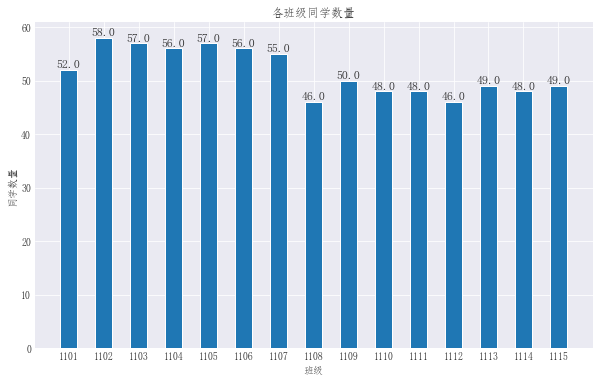

In [49]:
plt.figure(figsize=favorable_figsize)
plt.bar(student_count['bj'], student_count['counts'], width=0.5)
for i, val in enumerate(student_count['counts'].values):
    plt.text(x=i,
             y=val,
             s=float(val),
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'fontweight': 500,
                       'size': 12})
plt.gca().set_xticklabels(student_count['bj'])
plt.title('各班级同学数量')
plt.ylabel('同学数量')
plt.xlabel('班级')

横过来也可以：

Text(0, 0.5, 'Class')

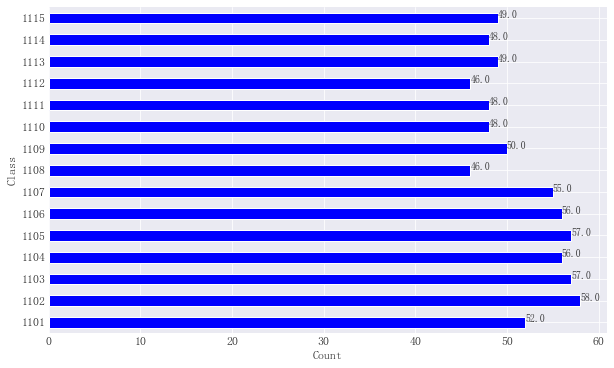

In [50]:
plt.figure(figsize=favorable_figsize)
student_count = scores.groupby('bj').size()
ax = student_count.plot(kind='barh', fontsize=12, color = 'blue')
[ax.text(v, i, '{:.1f}'.format(v)) for i, v in enumerate(student_count)] #:.1f显然是不必要的，只是为了和上图一致
plt.xlabel('Count', fontsize=12)
plt.ylabel('Class', fontsize=12)

通过饼图，来看看男女生的比例：

Text(0, 0.5, '')

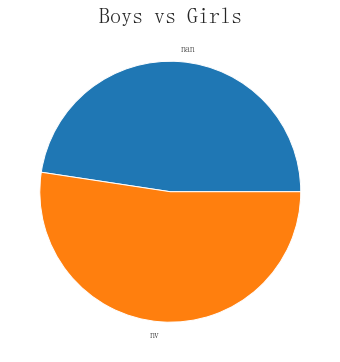

In [51]:
plt.figure(figsize=favorable_figsize)
sex = scores.groupby('xb').size()
sex.plot(kind='pie')
plt.title('Boys vs Girls', fontsize=22)
plt.ylabel('')

容易看出，男女生比例基本平衡，女生略多于男生。

## 类别变量 vs 类别变量

我们可以通过矩形树图来进一步观察性别分布：

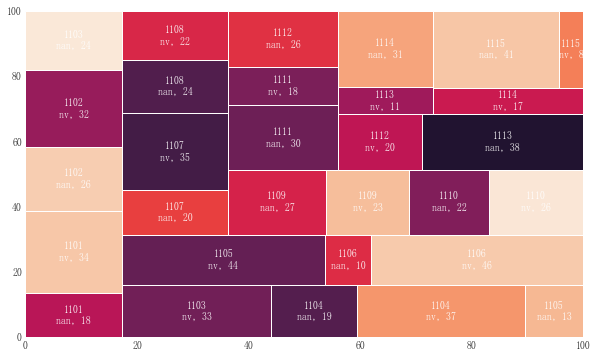

In [52]:
import squarify
class_sex_sum = scores.groupby(['bj', 'xb']).size().reset_index(name='count')
labels = ['%s\n%s, %s' % (label) for label in zip(class_sex_sum.bj,
                                                  class_sex_sum.xb,
                                                  class_sex_sum['count'])]
plt.figure(figsize=favorable_figsize)
squarify.plot(sizes=class_sex_sum['count'].values.tolist(),
              text_kwargs={'fontsize': 10,
                           'color': 'white'},
              label=labels)

上述图形中，将数量映射为区块大小。我们可以通过以下方法得到具体数量：

In [53]:
scores.groupby(['bj', 'xb']).size()

bj    xb 
1101  nan    18
      nv     34
1102  nan    26
      nv     32
1103  nan    24
      nv     33
1104  nan    19
      nv     37
1105  nan    13
      nv     44
1106  nan    10
      nv     46
1107  nan    20
      nv     35
1108  nan    24
      nv     22
1109  nan    27
      nv     23
1110  nan    22
      nv     26
1111  nan    30
      nv     18
1112  nan    26
      nv     20
1113  nan    38
      nv     11
1114  nan    31
      nv     17
1115  nan    41
      nv      8
dtype: int64

## 变量的分布

说到数据的形态，分布当然是最为重要的了。有一种说法：  
> Statistics is essentially the study of distributions。  

姑且不论这种说法是否夸张，从侧面也证明分布的重要性。我们先来看一下观察一下数学成绩的分布：

Text(0.5, 1.0, '数学成绩分布')

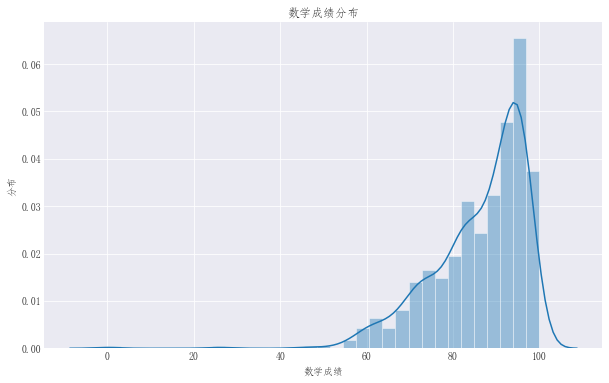

In [54]:
plt.figure(figsize=favorable_figsize)
sns.distplot(scores['sx'], label='数学成绩')
plt.xlabel('数学成绩')
plt.ylabel('分布')
plt.title('数学成绩分布')

查看各科成绩的分布：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002326334FEC8>,
      dtype=object)

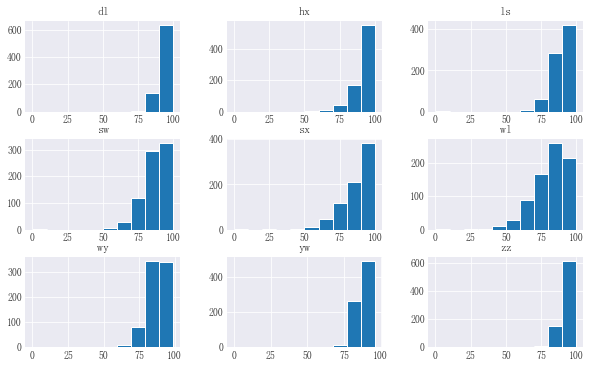

In [55]:
scores.hist(figsize=favorable_figsize)

从上图能看出，几乎每门课成绩里边，都有异常情况，存在分数极低的同学。

In [56]:
scores[subjects].min()

yw    0
sx    0
wy    0
zz    0
ls    0
dl    0
wl    0
hx    0
sw    0
dtype: int64

In [57]:
def how_many_zeros(cur_col):
    return (cur_col == 0).sum()

scores[subjects].apply(how_many_zeros, axis= 0)

yw    1
sx    1
wy    1
zz    1
ls    2
dl    1
wl    1
hx    1
sw    1
dtype: int64

显然，某门课得0分不正常，可能是因为缺考，或是成绩录入有误，可将其剔除：

In [58]:
scores = scores[scores.ls != 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232637FDDC8>,
      dtype=object)

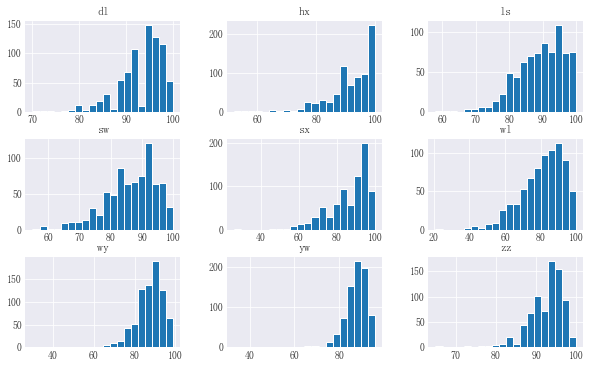

In [59]:
scores.hist(bins=20, figsize=favorable_figsize)

In [60]:
col_means = scores[subjects].mean()
col_means

yw    87.382924
sx    86.179819
wy    87.505821
zz    92.331177
ls    89.257439
dl    93.031048
wl    81.190168
hx    91.676585
sw    86.369987
dtype: float64

In [61]:
col_stds = scores[subjects].std()
col_stds

yw     4.945906
sx    10.453202
wy     7.004738
zz     4.564906
ls     6.960452
dl     4.873431
wl    12.121954
hx     7.601059
sw     8.268501
dtype: float64

<BarContainer object of 9 artists>

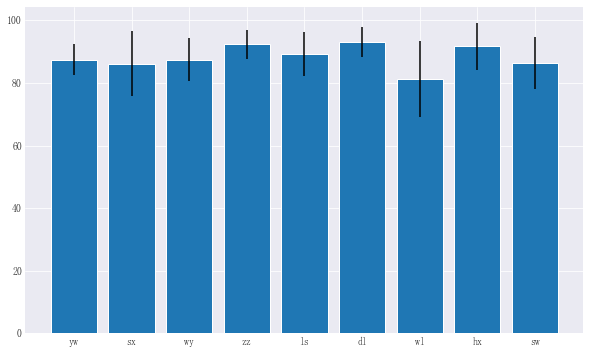

In [62]:
plt.figure(figsize=favorable_figsize)
plt.bar(x=col_means.index, 
        height = col_means, 
        yerr = col_stds.values)

要是觉得上边这个图比较复杂，也可以采用清爽一点的风格：

(21, 100)

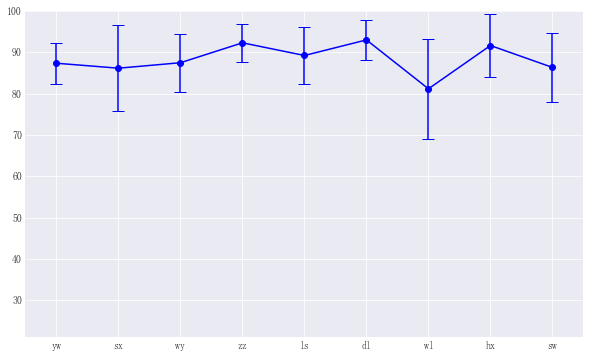

In [63]:
plt.figure(figsize=favorable_figsize)
plt.errorbar(col_means.index,
             col_means, 
             yerr=col_stds.values,
             c='blue',
             fmt='-o',
             capsize=6)
plt.xlim(-0.5, len(col_means) - 0.5)
plt.ylim(scores[subjects].values.min(), 100)

区分一下男女生也可以：

In [64]:
boy_means = scores[scores.xb == 'nan'][subjects].mean()
boy_stds = scores[scores.xb == 'nan'][subjects].std()
girl_means = scores[scores.xb == 'nv'][subjects].mean()
girl_stds = scores[scores.xb == 'nv'][subjects].std()

(-0.5, 10.5)

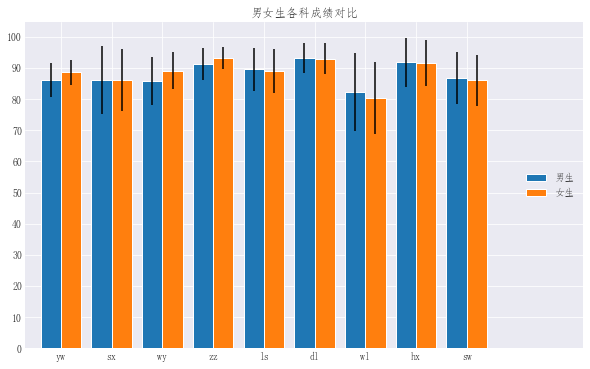

In [65]:
plt.figure(figsize=favorable_figsize)
ind = np.arange(len(boy_means))
width = 0.4       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, boy_means, width, yerr=boy_stds)
p2 = plt.bar(ind+width, girl_means, width, yerr=girl_stds)
plt.title('男女生各科成绩对比')
plt.xticks(ind+width/2, boy_means.index)
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('男生', '女生'), loc="center right")
plt.xlim(-0.5,10.5)

## 数值变量 vs 数值变量

Text(0.5, 1, 'regression line')

<Figure size 720x432 with 0 Axes>

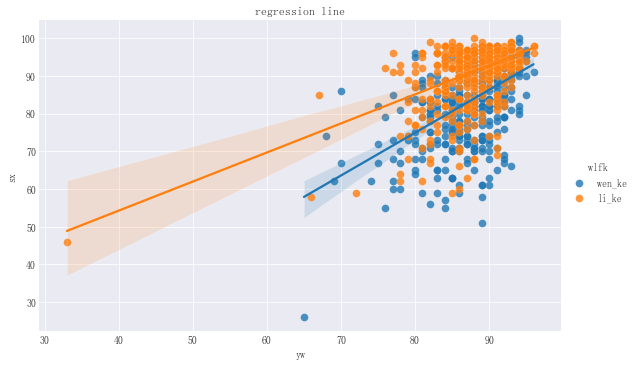

In [66]:
plt.figure(figsize=favorable_figsize)
sns.lmplot(x='yw',
           y='sx',
           hue='wlfk',
           data=scores,
           aspect=1.6,
           robust=True,
           palette='tab10',
           scatter_kws=dict(s=60,
                            linewidths=0.1,
                            edgecolors='white'))
plt.title('regression line')

<Figure size 720x432 with 0 Axes>

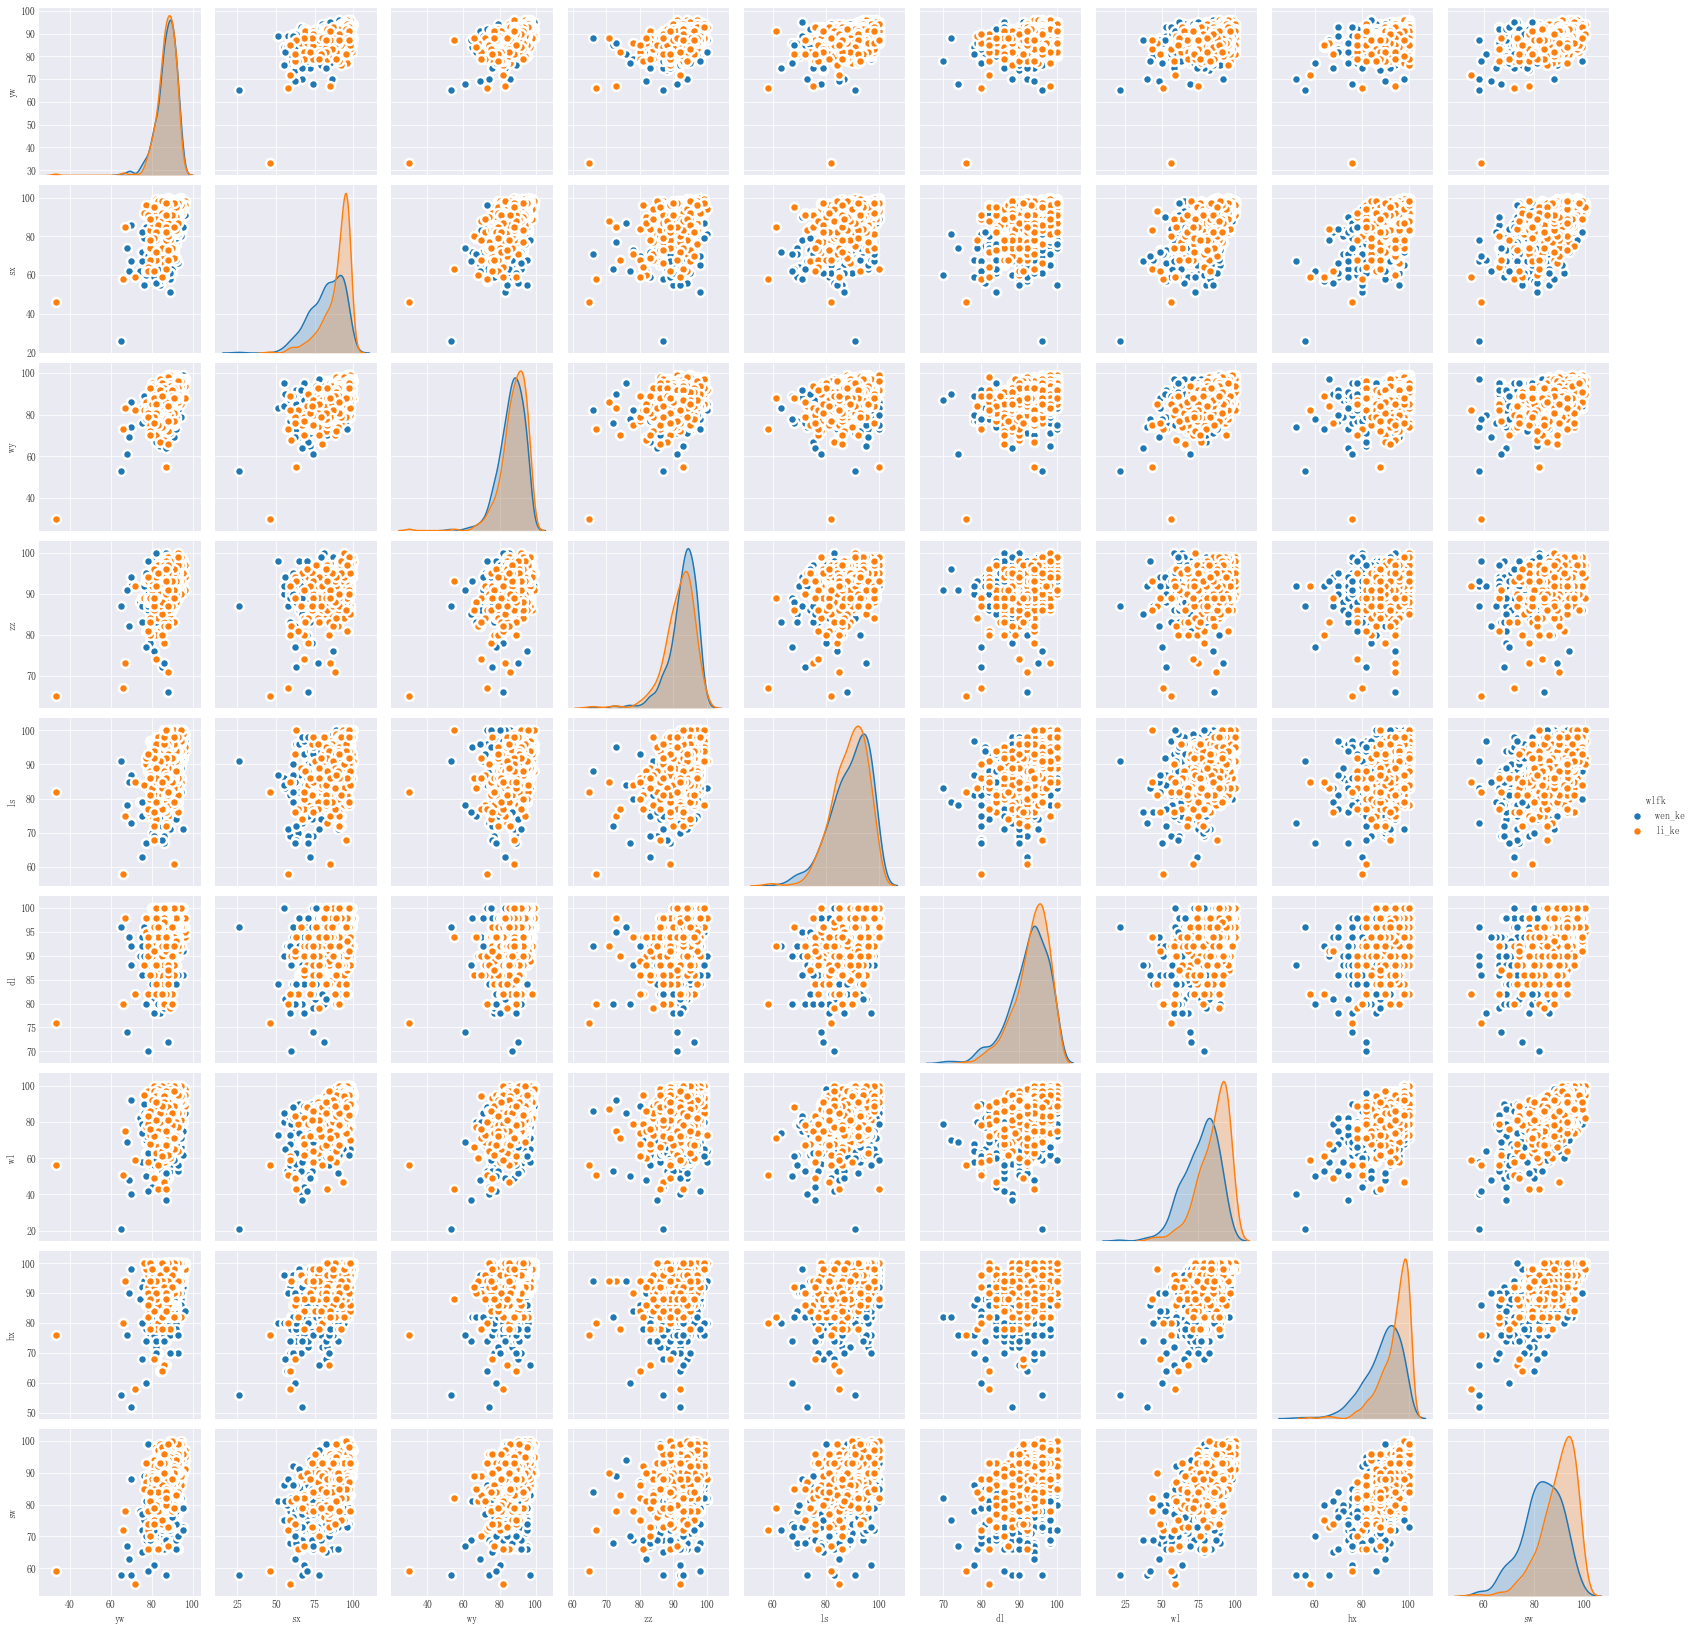

In [67]:
plt.figure(figsize=favorable_figsize)
sns.pairplot(scores.drop('bj', axis=1),
             kind='scatter',
             hue='wlfk',
             plot_kws=dict(s=80,
                           edgecolor='white',
                           linewidth=2.5))

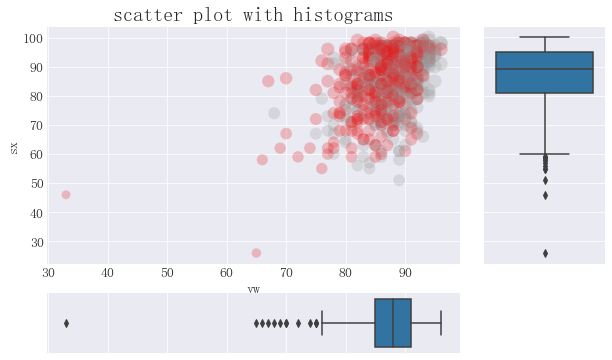

In [68]:
fig=plt.figure(figsize=favorable_figsize)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1],
                           xticklabels=[],
                           yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1],
                            xticklabels=[],
                            yticklabels=[])
ax_main.scatter(x='yw',
                y='sx',
                s=scores.yw + scores.sx,
                c=scores.xb.astype('category').cat.codes,
                alpha=0.25,
                data=scores,
                cmap='Set1',
                edgecolors='white',
                linewidths=0.1)
sns.boxplot(scores.yw, ax=ax_bottom, orient='h')
sns.boxplot(scores.sx, ax=ax_right, orient='v')

ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

ax_main.set(title='scatter plot with histograms',
            xlabel='yw',
            ylabel='sx')

ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() +
             ax_main.get_yticklabels()):
    item.set_fontsize(14)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

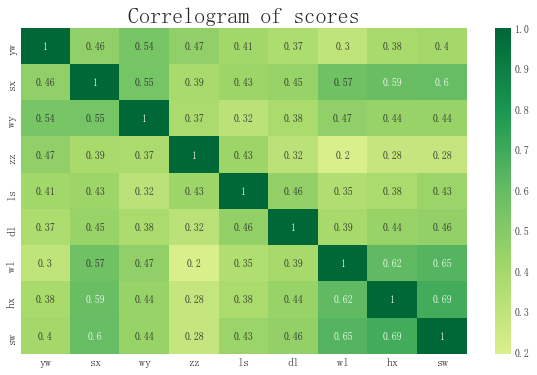

In [69]:
plt.figure(figsize=favorable_figsize)
sns.heatmap(scores.corr(),
           xticklabels = scores.corr().columns,
            yticklabels = scores.corr().columns,
            cmap = 'RdYlGn',
            center = 0,
            annot = True)
plt.title('Correlogram of scores',
         fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

## 类别变量 vs 数值变量

In [70]:
value_var = 'sx'
grp_var = 'bj'
value_agg = scores.loc[:, [value_var, grp_var]].groupby(grp_var)
vals = [scores[value_var].values.tolist() for x, scores in value_agg]

([<matplotlib.axis.XTick at 0x23268f3f648>,
 <a list of 11 Text xticklabel objects>)

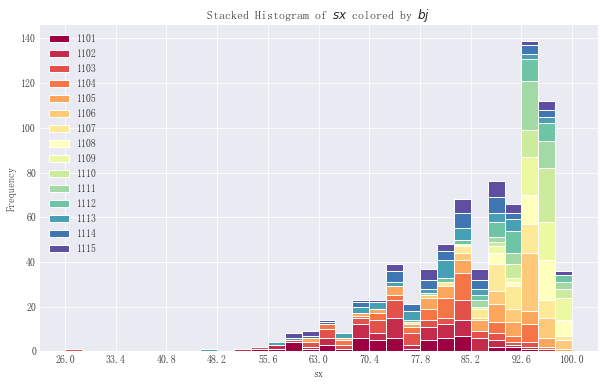

In [71]:
plt.figure(figsize=favorable_figsize)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals,
                           30,
                           stacked = True,
                           density = False,
                           color = colors[:len(vals)])
plt.legend({group:col for group, col in zip(np.unique(scores[grp_var]).tolist(), 
                                            colors[:len(vals)])},
          loc='upper left')
plt.title(f'Stacked Histogram of ${value_var}$ colored by ${grp_var}$')
plt.xlabel(value_var)
plt.ylabel('Frequency')
plt.xticks(ticks = bins[::3],
          labels = [round(b, 1) for b in bins[::3]])

Text(0.5, 1.0, 'Density Plot')

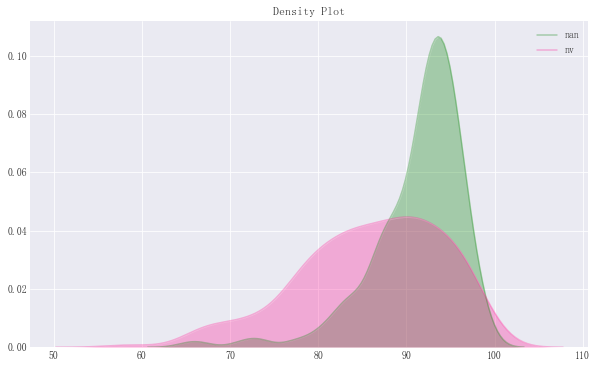

In [72]:
plt.figure(figsize=favorable_figsize)
sns.kdeplot(scores.loc[scores['xb'] == 'nan', 'zz'],
           shade = True,
           color = 'green',
           label = 'nan',
           alpha = 0.3)
sns.kdeplot(scores.loc[scores['xb'] == 'nv', 'sw'],
           shade = True,
           color = 'deeppink',
           label = 'nv',
           alpha = 0.3)
plt.title('Density Plot')

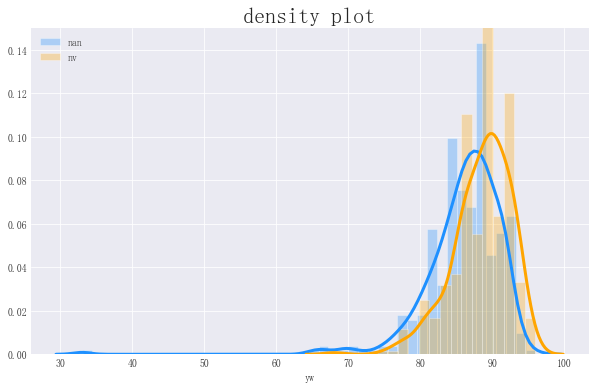

In [73]:
plt.figure(figsize=favorable_figsize)
sns.distplot(scores.loc[scores['xb'] == 'nan', 'yw'],
            color = 'dodgerblue',
            label = 'nan',
            hist_kws = {'alpha':0.3},
            kde_kws = {'linewidth':3})
sns.distplot(scores.loc[scores['xb'] == 'nv', 'yw'],
            color = 'orange',
            label = 'nv',
            hist_kws = {'alpha':0.3},
            kde_kws = {'linewidth':3})
plt.ylim(0, 0.15)
plt.title('density plot', fontsize = 22)
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Violin Plot of Mathematics')

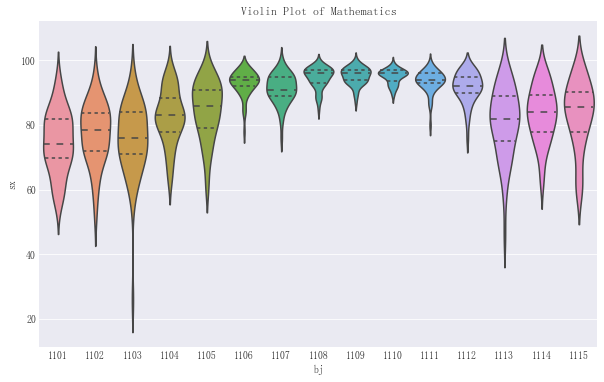

In [74]:
plt.figure(figsize=favorable_figsize)
sns.violinplot(x = 'bj',
               y = 'sx',
               data = scores,
               scale = 'width',
               inner = 'quartile')
plt.title('Violin Plot of Mathematics')

Text(0.5, 1, '各班级语数外成绩分布')

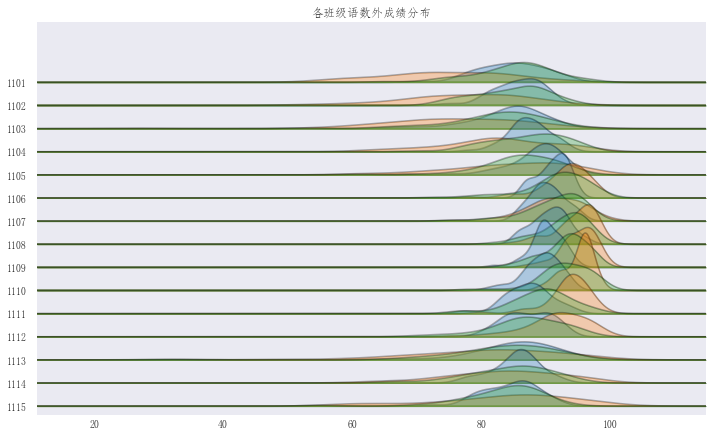

In [75]:
import joypy
fig, axes = joypy.joyplot(scores,
                          column=['yw', 'sx', 'wy'],
                          by='bj',
                          figsize=favorable_figsize,
                          alpha=0.3)
plt.title('各班级语数外成绩分布')

Text(0.5, 1.0, 'Boxplot of Mathmatics by Class')

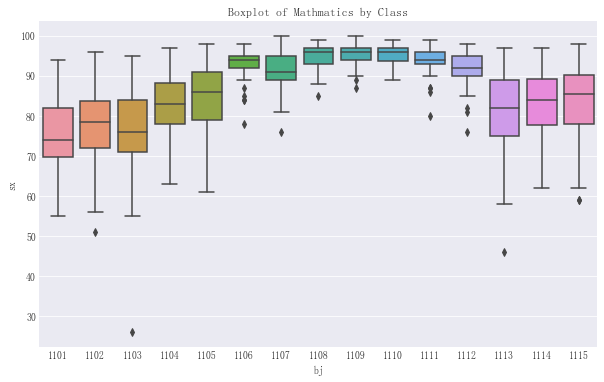

In [76]:
plt.figure(figsize=favorable_figsize)
sns.boxplot(x = 'bj',
           y = 'sx',
           data = scores,
           notch = False)
plt.title('Boxplot of Mathmatics by Class')

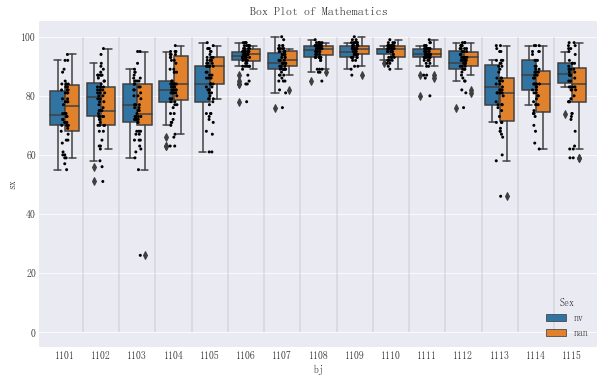

In [77]:
plt.figure(figsize=favorable_figsize)
sns.boxplot(x = 'bj',
           y = 'sx',
           data = scores,
           hue = 'xb')
sns.stripplot(x = 'bj',
              y = 'sx',
              data = scores,
              size = 3,
              color = 'black',
              jitter = 1)
for i in range(len(scores['bj'].unique())-1):
    plt.vlines(i+0.5,
              0,
              100,
              linestyle = 'solid',
              colors = 'grey',
              alpha = 0.2)
plt.title('Box Plot of Mathematics')
plt.legend(title = 'Sex', loc="low left")

上图可以视班级bj和性别xb为为分组变量，所进行的数据分布分析。要得到具体的数值，可采用以下方法：

In [78]:
pd.pivot_table(scores, index = ['bj', 'xb'], aggfunc=[np.mean])

mean                                                         \
                 dl         hx         ls         sw         sx         wl   
bj   xb                                                                      
1101 nan  91.777778  85.666667  88.000000  82.333333  76.000000  74.611111   
     nv   91.029412  86.764706  84.264706  80.794118  74.117647  77.382353   
1102 nan  90.653846  87.692308  86.230769  82.538462  76.769231  74.269231   
     nv   92.000000  88.187500  85.531250  83.656250  77.812500  74.625000   
1103 nan  90.958333  85.500000  87.125000  77.583333  74.416667  73.666667   
     nv   90.575758  87.696970  84.848485  80.121212  76.484848  75.030303   
1104 nan  93.526316  89.368421  91.157895  83.526316  84.578947  77.263158   
     nv   90.108108  87.567568  87.459459  80.648649  81.486486  73.432432   
1105 nan  93.846154  89.230769  92.076923  83.923077  89.000000  76.000000   
     nv   91.477273  88.863636  88.704545  81.545455  83.250000  77.045455   
1106 nan  97.000000  93.000000  97.000000  90.100000  93.700000  83.900000   
     nv   95.478261  92.434783  94.304348  86.956522  92.934783  79.239130   
1107 nan  97.000000  92.300000  96.550000  87.250000  91.900000  82.100000   
     nv   95.942857  93.085714  95.657143  87.628571  90.914286  80.771429   
1108 nan  96.541667  98.583333  94.791667  94.833333  94.875000  94.666667   
     nv   95.681818  98.727273  93.000000  94.727273  94.545455  92.136364   
1109 nan  96.555556  97.555556  93.185185  95.148148  95.333333  92.518519   
     nv   95.608696  98.347826  92.608696  94.739130  95.000000  92.000000   
1110 nan  96.636364  98.818182  94.545455  95.545455  95.045455  94.272727   
     nv   95.038462  98.076923  90.038462  93.961538  95.153846  91.000000   
1111 nan  92.433333  94.266667  87.100000  89.066667  93.866667  86.933333   
     nv   94.166667  94.666667  88.722222  89.222222  93.111111  85.444444   
1112 nan  92.720000  94.720000  89.240000  91.440000  92.080000  86.120000   
     nv   91.550000  93.400000  86.750000  91.700000  91.200000  81.500000   
1113 nan  91.789474  91.210526  86.526316  84.789474  79.842105  77.868421   
     nv   91.727273  89.818182  84.000000  85.454545  83.545455  77.727273   
1114 nan  90.612903  89.483871  85.580645  84.193548  81.645161  79.612903   
     nv   91.823529  92.823529  87.588235  85.117647  86.882353  77.588235   
1115 nan  90.625000  89.550000  86.400000  82.525000  82.600000  79.250000   
     nv   92.875000  89.750000  81.000000  84.000000  86.875000  81.750000   

                                           
                 wy         yw         zz  
bj   xb                                    
1101 nan  82.666667  82.611111  91.055556  
     nv   86.235294  85.852941  91.323529  
1102 nan  83.230769  85.115385  90.038462  
     nv   85.812500  86.312500  92.093750  
1103 nan  79.583333  80.958333  90.250000  
     nv   84.151515  86.303030  91.666667  
1104 nan  85.315789  86.578947  91.421053  
     nv   88.108108  87.810811  92.756757  
1105 nan  83.230769  89.384615  93.461538  
     nv   86.795455  88.113636  94.477273  
1106 nan  88.400000  89.200000  94.700000  
     nv   92.173913  91.521739  95.478261  
1107 nan  88.900000  89.350000  94.400000  
     nv   92.971429  90.857143  95.285714  
1108 nan  92.083333  90.208333  94.083333  
     nv   93.772727  91.318182  92.590909  
1109 nan  92.111111  89.000000  94.222222  
     nv   94.043478  91.521739  94.086957  
1110 nan  92.181818  89.181818  95.136364  
     nv   93.615385  89.538462  93.615385  
1111 nan  88.466667  86.100000  90.800000  
     nv   90.555556  89.166667  93.222222  
1112 nan  85.560000  86.760000  91.840000  
     nv   88.750000  87.950000  92.350000  
1113 nan  81.763158  83.552632  87.368421  
     nv   87.000000  86.272727  92.363636  
1114 nan  83.419355  84.935484  88.677419  
     nv   85.588235  86.529412  92.000000  
1115 nan  82.600000  84.225000  89.675000  
     nv   86.875000  86.000000  

下边的方法可能更加简洁：

In [79]:
scores.groupby(['bj','xb']).describe().T

bj             1101                  1102                  1103             \
xb              nan         nv        nan         nv        nan         nv   
yw count  18.000000  34.000000  26.000000  32.000000  24.000000  33.000000   
   mean   82.611111  85.852941  85.115385  86.312500  80.958333  86.303030   
   std     5.157962   4.704172   3.766451   3.946722   6.887160   3.302318   
   min    70.000000  77.000000  74.000000  76.000000  65.000000  78.000000   
   25%    79.500000  82.250000  83.250000  83.000000  76.750000  85.000000   
...             ...        ...        ...        ...        ...        ...   
sw min    58.000000  67.000000  68.000000  68.000000  58.000000  66.000000   
   25%    76.000000  78.000000  78.250000  80.000000  71.000000  73.000000   
   50%    85.000000  80.000000  81.000000  84.500000  81.000000  82.000000   
   75%    90.000000  86.750000  87.750000  88.250000  84.250000  86.000000   
   max    99.000000  94.000000  92.000000  96.000000  90.000000  95.000000   

bj             1104                  1105             ...       1111  \
xb              nan         nv        nan         nv  ...        nan   
yw count  19.000000  37.000000  13.000000  44.000000  ...  30.000000   
   mean   86.578947  87.810811  89.384615  88.113636  ...  86.100000   
   std     3.167821   3.178380   1.804553   5.203826  ...   3.055239   
   min    81.000000  78.000000  87.000000  68.000000  ...  77.000000   
   25%    84.500000  86.000000  88.000000  85.750000  ...  84.000000   
...             ...        ...        ...        ...  ...        ...   
sw min    74.000000  59.000000  72.000000  66.000000  ...  78.000000   
   25%    80.500000  77.000000  78.000000  78.000000  ...  86.000000   
   50%    83.000000  81.000000  84.000000  83.000000  ...  89.000000   
   75%    87.500000  86.000000  90.000000  85.000000  ...  91.000000   
   max    96.000000  97.000000  99.000000  93.000000  ...  99.000000   

bj                        1112                   1113                  1114  \
xb               nv        nan          nv        nan         nv        nan   
yw count  18.000000  25.000000   20.000000  38.000000  11.000000  31.000000   
   mean   89.166667  86.760000   87.950000  83.552632  86.272727  84.935484   
   std     3.745586   3.608786    3.531438  10.326291   3.635682   3.889606   
   min    78.000000  80.000000   81.000000  33.000000  80.000000  77.000000   
   25%    88.000000  84.000000   85.750000  82.000000  85.500000  82.500000   
...             ...        ...         ...        ...        ...        ...   
sw min    83.000000  86.000000   82.000000  59.000000  76.000000  66.000000   
   25%    86.000000  89.000000   89.750000  80.250000  83.500000  78.000000   
   50%    89.000000  92.000000   91.500000  86.000000  87.000000  86.000000   
   75%    91.750000  94.000000   93.250000  90.000000  88.000000  90.000000   
   max    96.000000  97.000000  100.000000  95.000000  90.000000  96.000000   

bj                        1115             
xb               nv        nan         nv  
yw count  17.000000  40.000000   8.000000  
   mean   86.529412  84.225000  86.000000  
   std     2.786522   3.996713   5.070926  
   min    80.000000  72.000000  78.000000  
   25%    85.000000  81.750000  82.500000  
...             ...        ...        ...  
sw min    75.000000  55.000000  78.000000  
   25%    82.000000  79.000000  78.750000  
   50%    85.000000  84.000000  83.500000  
   75%    89.000000  88.000000  85.250000  
   max    98.000000  93.000000  99.000000  

[72 rows x 30 columns]

## 数据降维及其可视化

In [80]:
cols = subjects.copy()
cols.append('wlfk')

(-1, 9)

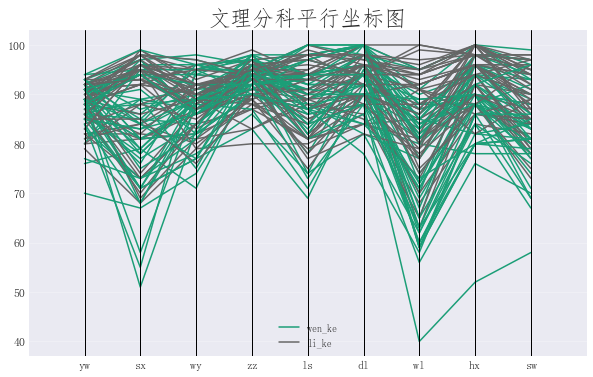

In [81]:
import random
from pandas.plotting import parallel_coordinates
n = 100
random.seed(2012)
selected_idx = random.choices(scores.index, k = n)
scores_sub = scores.loc[selected_idx, cols]

plt.figure(figsize=favorable_figsize)
parallel_coordinates(scores_sub,
                     'wlfk', 
                     colormap = 'Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('文理分科平行坐标图', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="lower center")

plt.xlim(-1, 9)



In [82]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X.drop('xb', axis=1))
X_projected = iso.transform(X.drop('xb', axis = 1))
X_projected_df = pd.DataFrame(X_projected)
X_projected_df['wlfk'] = y
X_projected_df.columns = ['p1', 'p2', 'wlfk']

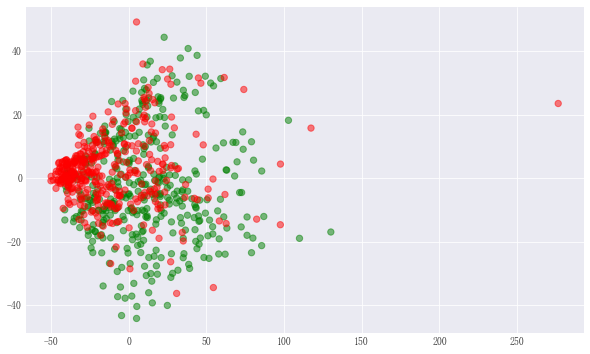

In [83]:
plt.figure(figsize=favorable_figsize)
colors = np.array(['red', 'green'])
plt.scatter(X_projected[:, 0],
            X_projected[:, 1],
            color=colors[(y_numeric + 1) // 2],
            edgecolors=colors[(y_numeric + 1) // 2],
            alpha=0.5,
            s=40)

## 数据再整理

在探索数据的过程中，发现scores存在脏数据，需要重新返回去更改我们的数据并重新存盘：

In [84]:
X = scores.drop(['bj', 'wlfk'], axis = 1)
y = scores.wlfk
subjects = ['yw', 'sx', 'wy', 'zz', 'ls', 'dl', 'wl', 'hx', 'sw']
from sklearn.preprocessing import LabelEncoder
class_encoding = LabelEncoder()
y_numeric = class_encoding.fit_transform(y)
def to_be_numeric(X, nonnumeric_cols):
    for nnc in nonnumeric_cols:
        dummies = pd.get_dummies(X.loc[:, nnc], prefix = nnc)
        X = pd.concat([X, dummies], axis = 1)
    X = X.drop(nonnumeric_cols, axis = 1)
    return X
X_numeric = to_be_numeric(X, ['xb'])

In [85]:
import pickle
objects_to_be_saved = {'X_numeric': X_numeric,
                       'y_numeric':y_numeric}
with open('pickle/ch5_data.pkl', 'wb') as f:
    pickle.dump(objects_to_be_saved, f)

# 算法建模

## 分类器脉络

分类器的大致脉络如下：<br>
<img src=figtabs/ch5/clf.png align=center width=65% height=65% />

加载包并进行环境设置：

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


import itertools
from itertools import cycle

from mlxtend.plotting import plot_decision_regions
from mlxtend.utils import check_Xy, format_kwarg_dictionaries

from math import floor
from math import ceil

import pickle

plt.style.use('classic')
plt.rcParams['font.sans-serif'] = ['FangSong']  # 制定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


rng = np.random.RandomState(2012)

重新载入前述数据：

In [87]:
with open('pickle/ch5_data.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
X_numeric = objects_awaken['X_numeric']
y_numeric = objects_awaken['y_numeric']

In [88]:
X_numeric

,yw,sx,wy,zz,ls,dl,wl,hx,sw,xb_nan,xb_nv
0,94,82,96,97,97,98,95,94,88,0,1
1,87,94,89,95,94,94,90,90,89,1,0
2,92,79,86,98,95,96,89,94,87,1,0
3,91,84,96,93,97,94,82,90,83,0,1
4,85,92,82,93,87,88,95,94,93,1,0
...,...,...,...,...,...,...,...,...,...,...,...
770,79,78,70,83,86,86,76,78,70,1,0
771,87,63,55,93,100,94,43,88,82,1,0
772,85,59,89,80,85,82,61,64,75,1,0
773,81,62,76,89,76,91,49,68,74,1,0


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_numeric,
                                                    test_size=0.3, random_state=rng)

数据集划分为训练和测试数据集，要尽量保留有价值的信息，这些信息将有利于训练机器学习算法。因此，我们一般不会为测试数据集分配太多的数据。不过，测试集越小，对泛化误差的估计将会越不准确。在对数据集进行划分时，需要对此进行权衡。在实际应用中，基于原始数据的大小，常用的划分比例是60:40、70:30，或者80:20。对于非常庞大的数据集，将训练集和测试集的比例按照90:10或者99:1进行划分也是常见且可以接受的。

In [90]:
X_train.shape

(541, 11)

In [91]:
X_train.head()

,yw,sx,wy,zz,ls,dl,wl,hx,sw,xb_nan,xb_nv
444,89,93,97,96,92,100,95,100,100,0,1
257,89,79,71,94,91,98,85,82,84,1,0
300,92,87,92,97,92,98,89,100,86,0,1
16,89,71,90,95,91,96,84,88,80,0,1
554,85,96,85,93,90,92,97,94,90,1,0


当然，如果有必要的话，也可以通过类似下边的代码，来自星创建训练集和测试集：

In [92]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

## 特征标准化

特征缩放（feature scaling）是数据预处理过程中至关重要的一步，但却极易被人们忽略。决策树和随机森林是机器学习算法中为数不多的不需要进行特征缩放的算法。然而，对大多数机器学习和优化算法而言，将特征的值缩放到相同的区间可以使其性能更佳。   

$x_i^{std} = \frac{{{x_i} - \max \left( x \right)}}{{\max \left( x \right) - \min \left( x \right)}}$

我们用下边的语言来描述，相信同学们容易看得懂，尤其是有了向量化运算的基础之后：<br>
$X = \frac{{X - \max \left( X \right)}}{{\max \left( X \right) - \min \left( X \right)}}$

用Python语言来描述的话，与数学语言完全一样——假定$X$是一个向量：<br>
$X = \frac{{X - \max \left( X \right)}}{{\max \left( X \right) - \min \left( X \right)}}$<br>
当然，具体代码，稍有区别：<br>
$(X - min(X)) / (np.max(X) - np.min(X))$

我们不主张重复造轮子，在工业级/商业级实践中，直接用sklearn就好：

In [93]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

也可以采用如下标准化的方法：  

$x_i^{std} = \frac{{{x_i} - \mu }}{\sigma }$

改用Python来描述的话：<br>
$X = \frac{{X - np.\min \left( X \right)}}{{np.\max \left( X \right) - np.\min \left( X \right)}}$

当然，在sklearn中也早有标准的实现：

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

当然，自己写代码实现一下，其实也不复杂：

In [95]:
X_train_std = X_train.copy()
X_train_std.iloc[:, 0] = (X_train.iloc[:, 0] - X_train.iloc[:, 0].mean()) / X_train.iloc[:, 0].std()

在上面的代码中，从preprocessing模块中加载了StandardScaler类，并实例化了一个StandardScaler对象，用变量sc作为对它的引用。使用StandardScaler中的fit方法，可以计算训练数据中每个特征的$\mu $（样本均值）和$\sigma$（标准差）。通过调用transform方法，可以使用前面计算得到的$\mu $和$\sigma$来对训练数据做标准化处理。

## 模型评估

In [96]:
from sklearn.metrics import accuracy_score
def print_performance(real, pred):
    print('误分样本数（Misclassified samples）: {}'.format((real != pred).sum()))
    print('准确率(accuracy): {:.2f}%'.format(accuracy_score(real, pred)*100))

In [97]:
#def accuracy_score(truth, pred):
#    if len(truth) == len(pred): 
#        return "Predictions have an accuracy of {:.2f}.".format((truth == pred).mean()*100)
#    else:
#        return "Number of predictions does not match number of outcomes!"

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

## 近邻法

从过程来讲，学习可以分为两种：<br>
* 急切学习法Eager Learner：在接收待分类的新元组之前就构造泛化模型。决策树归纳、贝叶斯分类、基于规则的分类等都属于急切学习法
* 惰性学习法Lazy Learner：当给定一个训练元组时，简单地存储它（或稍加处理），并且一直等待，直到给定一个检验元组。仅当看到检验元组时，才进行泛化，以便根据与存储元组的相似性对该元组进行分类。惰性学习在提供训练元组时只做少量工作，在分类或数值预测时做更多工作。<br>

近邻法属于惰性学习发法，其原理非常简单直观：拿到一个测试样本时，在数据空间里环顾四周，看看身边的$k$小伙伴头上大多贴的什么标签，然后把自己也贴上相同的标签。

输入：最近邻数目$k$，训练集$S$，测试集$T$  
输出：对测试集$T$中所有测试样本预测其类标号值  
1. for 每个测试样本$z = \left( {{X^*},{y^*}} \right) \in T$   
2. &emsp;&emsp;计算$𝑧$和每个训练样本$\left( {X,y} \right) \in S$之间的距离$d\left( {X,{X^*}} \right)$  
3. &emsp;&emsp;选择离$𝑧$最近的$k$最近邻集合${S_z} \subseteq S$
4. &emsp;&emsp;多数表决${y^*} = \mathop {\arg \max }\limits_v \sum\nolimits_{\left( {{X_i},{y_i}} \right) \in {D_Z}} {I\left( {v = {y_i}} \right)}$     
5. end for

In [99]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 65
准确率(accuracy): 71.98%


In [100]:
clf =  KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 59
准确率(accuracy): 74.57%


## 决策树

决策树是一个倒着生长的树：<br>
![img](figtabs/ch5/cart.png)

决策树的生长：递归划分、不断生长；局部最优、步步为赢<br>
如果数据无需再分（如当前数据记录类标签同为一类）、或是无法再分（如所有记录的属性值相同、或是数据记录数太少），则建立叶子结点，并按照少数服从多数（有生于无）的原则，给叶子结点打上标签；否则，寻找一个属性，根据该属性的不同取值情况，把数据分成纯度较大的两个（或几个）子集。对于这些子集，递归执行以上操作，开枝散叶。<br>
<img src=figtabs/ch5/cart_a.png align=left width = 40% height = 40% />

决策树的原理大致都差不多，不同点在于不同算法不纯度的度量：<br>
![img](figtabs/ch5/cart_impurity.png)

In [101]:
clf = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 68
准确率(accuracy): 70.69%


数据降维之后的结果：

In [102]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([5.88322681e-01, 1.15896973e-01, 7.09090621e-02, 6.31060428e-02,
       5.34905282e-02, 3.57428780e-02, 2.61395178e-02, 2.56286253e-02,
       2.00383455e-02, 7.25346554e-04, 6.00591219e-36])

In [103]:
X_train_pca.shape[1]

11

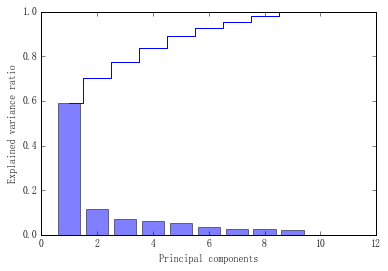

In [104]:
plt.bar(range(1, 12), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 12), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## 随机森林

一棵决策树可以学到很复杂的规则。然而，很可能会导致过拟合问题——学到的规则只适用于训练集。解决方法之一就是调整决策树算法，限制它所学到的规则的数量。例如，把决策树的深度限制在三层，只让它学习从全局角度拆分数据集的最佳规则，不让它学习适用面很窄的特定规则，这些规则会将数据集进一步拆分为更加细致的群组。使用这种折中方案得到的决策树泛化能力强，但整体表现稍弱。  
为了弥补上述方法的不足，我们可以创建多棵决策树，用它们分别进行预测，再根据少数服从多数的原则从多个预测结果中选择最终预测结果。这正是随机森林的工作原理。

设：给定$d$个元组的训练集$D$，为组合分类器产生$k$棵决策树
* (1)使用有放回抽样生成训练集$D_i$，每个$D_i$都是$D$的一个自助样本，某些元组在$D_i$中出现多次，而某些元组不出现
* (2)每个自助样本集生长为单棵分类树（随机选取分裂属性集）：设$F$是用来在每个节点决定划分的属性数，其中$F$远小于可用属性数。为构造决策树分类器$M_i$，在每个节点随机选择$F$个属性作为该节点划分的候选属性。使用CART方法增长树，增长到最大规模且不剪枝
* (3) 采用简单多数投票法得到随机森林的结果

<img src=figtabs/ch5/random_forest.png align=left width = 60% height = 60% />

scikit-learn 库中的 RandomForestClassifier 就是对随机森林算法的实现，它提供了一系列参数。因为它使用了 DecisionTreeClassifier 的大量实例，所以它俩的很多参数是一致的，比如决策标准（基尼不纯度/信息增益）、 max_features 和 min_samples_split 。
当然，集成过程还引入了一些新参数：  
* n_estimators ：用来指定创建决策树的数量。该值越高，所花时间越长，正确率（可能）也越高。  
* oob_score ：如果设置为真，测试时将不使用训练模型时用过的数据  
* n_jobs ：采用并行计算方法训练决策树时所用到的内核数量。

In [105]:
clf = RandomForestClassifier(criterion='gini',
                                n_estimators=500, 
                                random_state=rng)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 49
准确率(accuracy): 78.88%


## 朴素贝叶斯

先看一下贝叶斯公式:<br>
$p\left( {y|{X_1},{X_2}, \cdots ,{X_n}} \right) = \frac{{p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right)}}{{p\left( {{X_1},{X_2}, \cdots ,{X_n}} \right)}}$

分母不发挥作用：<br>
$p\left( {y|{X_1},{X_2}, \cdots ,{X_n}} \right) = \frac{{p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right)}}{{p\left( {{X_1},{X_2}, \cdots ,{X_n}} \right)}} \propto p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right)$

朴素一点：<br>
$p\left( {y|{X_1},{X_2}, \cdots ,{X_n}} \right) \propto p\left( {{X_1},{X_2}, \cdots ,{X_n}|y} \right)p\left( y \right) = p\left( y \right)\prod\limits_{j = 1}^n {p\left( {{X_j}|y} \right)}$

用于分类：<br>
$classify\left( {{X_1},{X_2}, \cdots ,{X_n}} \right) = \mathop {\arg \max }\limits_c p\left( {y = c} \right)\prod\limits_{j = 1}^n {p\left( {{X_j}|y = c} \right)}$

In [106]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 77
准确率(accuracy): 66.81%


得到预测的概率值，而不是类别本身：

In [107]:
y_test_pred_prob = clf.predict_proba(X_test)
y_test_pred_prob[-10:].round(2)

array([[0.26, 0.74],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.73, 0.27],
       [0.08, 0.92],
       [0.97, 0.03],
       [0.88, 0.12],
       [0.97, 0.03]])

## 逻辑斯蒂回归

要综合利用好属性、特征信息，一个简单的办法是把他们“加”起来：  
$z = info\left( x \right) = {w_0} + {w_1}{x_1} +  \cdots  + {w_m}{x_m}$  
我们的目标：  
$info\left( x \right) \to \left[ {0,1} \right]$

令：  
$p\left( {y = 1|x} \right) = \frac{1}{{1 + {e^{ - info\left( x \right)}}}} = \frac{1}{{1 + {e^{ - z}}}} = \phi \left( z \right) \in \left[ {0,1} \right]$

我们定义事件发生比odd ratio:$\frac{p}{{1 - p}}$。其中$p$为正事件发生的概率。此处，正事件并不意味着好的事件，而是指我们所要预测的事件，以一个患者患有某种疾病的概率为例，我们可以将正事件的类标标记为$y＝1$。更进一步，我们可以定义logit函数，它是几率比的对数函数（log-odds，对数几率）：  
$logit\left( p \right) = \log \left( {\frac{p}{{1 - p}}} \right)$

$logit\left( {p\left( {y = 1|x} \right)} \right) = {w_0}{x_0} + {w_1}{x_1} +  \cdots  + {w_p}{x_p} = \sum\limits_{j = 0}^p {{w_j}{x_j}}  = {w^T}x$  
即：$\ln \left( {odd} \right) = \ln \frac{{p\left( {y = 1|x} \right)}}{{1 - p\left( {y = 1|x} \right)}} = z = info\left( x \right)$

我们可以通过极大似然函数：  
$\begin{array}{l}
l\left( w \right) = \ln L\left( w \right) = \ln \left( {\prod\limits_{i = 1}^m {p{{\left( {{y_i}|{x^{(i)}}} \right)}^{{y_i}}}{{\left( {1 - p\left( {{y_i}|{x^{(i)}}} \right)} \right)}^{1 - {y_i}}}} } \right)\\
\;\;\;\;\;\;\; = \ln \left( {\prod\limits_{i = 1}^m {\phi {{\left( {{z^{(i)}}} \right)}^{{y_i}}}{{\left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)}^{1 - {y_i}}}} } \right)\\
\;\;\;\;\;\;\; = \sum\limits_{i = 1}^m {\left( {{y_i}\ln \left( {\phi \left( {{z^{(i)}}} \right)} \right) + \left( {1 - {y_i}} \right)\ln \left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)} \right)} 
\end{array}$

推导得出代价函数：  
$J\left( w \right) = \sum\limits_{i = 1}^m { - {y_i}\log \left( {\phi \left( {{z^{(i)}}} \right)} \right) - \left( {1 - {y_i}} \right)\log \left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)}$

进一步地，通过正则化解决过拟合问题：  

正则项：  
$L2:\left\| w \right\|_2^2 = \sum\limits_{j = 1}^m {w_j^2}$


$L1:{\left\| w \right\|_1} = \sum\limits_{j = 1}^m {\left| {{w_j}} \right|}$

其中的参数$C$为了与支持向量机保持一致，是正则化系数的倒数：  
$C = \frac{1}{\lambda }$
逻辑斯蒂回归中的正则化代价函数写作：  
$J\left( w \right) = C\left\{ {\sum\limits_{i = 1}^m { - {y_i}\log \left( {\phi \left( {{z^{(i)}}} \right)} \right) - \left( {1 - {y_i}} \right)\log \left( {1 - \phi \left( {{z^{(i)}}} \right)} \right)} } \right\} + \frac{1}{2}{\left\| w \right\|^2}$

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100.0, random_state=rng)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 54
准确率(accuracy): 76.72%


对于scikit-learn中支持L1的正则化模型，我们可以通过将penalty参数设定为‘l1’,

In [109]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [110]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [111]:
print_performance(y_test, lr.predict(X_test_pca))

误分样本数（Misclassified samples）: 81
准确率(accuracy): 65.09%


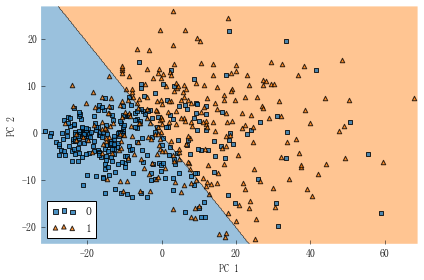

In [112]:
plot_decision_regions(X_train_pca, y_train, clf=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

## 支持向量机

支持向量机首先涉及到分类超平面的概念。以下分别是一维、二维、三维空间中的超平面<br>
<img src=figtabs/ch5/svm_hyperplane.png align=left width=80% height=80% /> 

显然，他们都有共同的形式：<br>
${w^T}x = 0$

要将数据点分开，有很多这样的超平面。相比较而言，下图中红色的部分有更宽的边缘，“道路”更宽、泛化能力更强<br>
<img src=figtabs/ch5/svm_margin.png align=left width=30% height=30% />

这个边缘怎么表示呢：<br>
令两个平行的边界分别为：<br>
${w^T}x + b = 1$<br>
${w^T}x + b = -1$<br>
于是有：<br>
$\begin{array}{l}
{w^T}\left( {{p_1} - {p_2}} \right) = 2\\
 \Rightarrow \left\| w \right\| \times d = 2\\
 \Rightarrow d = \frac{2}{{\left\| w \right\|}}
\end{array}$<br>
<img src=figtabs/ch5/svm_margin2.png align=left width=30% height=30% />

实现间隔最大化，等价于最小化目标函数：<br>
$\mathop {\min }\limits_w \frac{{{{\left\| w \right\|}^2}}}{2}$<br>
满足如下约束：<br>
${y_i}\left( {{w^T}x + b} \right) \ge 1$<br>
通过拉格朗日法求解，得到权向量最优解为：<br>
${w^*} = \sum\limits_{i = 1}^m {\alpha _i^*{y_i}{x^{\left( i \right)}}}$<br>
相应的决策函数为：<br>
${w^*}{x^{\left( j \right)}} + b = {\left( {\sum\limits_{i = 1}^m {\alpha _i^*{y_i}{x^{\left( i \right)}}} } \right)^T}{x^{\left( j \right)}} + b = \sum\limits_{i = 1}^m {\alpha _i^*{y_i}\left\langle {{x^{\left( i \right)}},{x^{\left( j \right)}}} \right\rangle }  + b$<br>
由此可以看出：对于测试集的预测，只需要计算它与训练数据点的内积即可；准确地讲，是只需要计算它和支持向量的内积即可，因为非支持向量的$\alpha$均为零

<img src=figtabs/ch5/svm_softmargin.png align=left width=30% height=30% />

对比上图中的两个超平面。红色的超平面，错分了一个样本，蓝色的超平面完全正确。但是，红色道路依然比蓝色的道路更可取，软间隔soft margin学习允许一定训练错误的决策边界

在数学上，相当于是引入了松弛变量：<br>
$\begin{array}{l}
{w^T}{x^{(i)}} + b = 1 - {\xi _i},{y_i} = 1\\
{w^T}{x^{(i)}} + b = {\rm{ - }}1 + {\xi _i},{y_i} =  - 1
\end{array}$<br>
相应的目标函数为：<br>
$\frac{{{{\left\| w \right\|}^2}}}{2} + C{\left( {\sum\limits_{i = 1}^N {{\xi _i}} } \right)^k}$

以上都是线性可分的情况，也可能存在如下线性不可能的情形：<br>
<img src=figtabs/ch5/svm_nonlinear.png align=left width=50% height=50% />

对于非线性问题，需要做到：<br>
* 第一，将属性空间映射到特征空间；
* 第二，在特征空间中采用线性分类器进行分类。<br>
<img src=figtabs/ch5/svm_nonlinear_1D.png align=left width=50% height=50% />

决策规则为：<br>
$\sum\limits_{i = 1}^m {\alpha _i^*{y_i}\left\langle {\phi \left( {{x^{\left( i \right)}}} \right),{x^{\left( j \right)}}} \right\rangle }  + b$<br>
其中，$\phi$为属性空间到特征空间的映射：$\phi :{\cal X} \to {\cal F}$<br>
引入核方法：<br>
一对向量的核函数等于变换后空间中计算这对向量的内积：$K\left( {{x^{\left( i \right)}},{x^{\left( j \right)}}} \right) = \left\langle {\phi \left( {{x^{\left( i \right)}}} \right),\phi \left( {{x^{\left( j \right)}}} \right)} \right\rangle $<br>
也就是说，有了核函数，我们甚至不需要知道如何具体映射到高维空间

In [113]:
model = SVC(kernel='linear',
            C=1.0,
            random_state=rng)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 57
准确率(accuracy): 75.43%


In [114]:
model = SVC(kernel='rbf',  
          gamma=0.003, 
          C=1.0, 
          random_state=rng)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print_performance(y_test, y_test_pred)

误分样本数（Misclassified samples）: 51
准确率(accuracy): 78.02%


## 参数调优——格子点搜索

参数的设置，当然可以自己写嵌套循环来实现，不过更好的办法，是采用格子点搜索：

In [115]:
parameter_space = {
                   "max_features": [2, 10, 'auto'],
                   "n_estimators": [100,500],
                   "criterion": ["gini", "entropy"],
                   "min_samples_leaf": [2, 4, 6],
                   }
clf = RandomForestClassifier(random_state=rng)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_train, y_train)
print("Accuracy: {0:.2f}%".format(grid.best_score_ * 100))

Accuracy: 77.27%


这次正确率提升较大，达到了76.57%！  
输出用网格搜索找到的最佳模型，查看都使用了哪些参数。代码如下：

In [116]:
print(grid.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False,
                       random_state=RandomState(MT19937) at 0x2326D9B0378,
                       verbose=0, warm_start=False)


可能也有同学会对自动优化参数比较感兴趣，也就是说为的机器学习自动化。可以自行查阅相关内容，比如研究一下autosklearn模块。

## K折交叉检验

K折交叉检验的原理如下：<br>
<img src=figtabs/ch5/k_fold.png align=center height=50% width=50% />

scikit-learn 库实现的随机森林算法使用估计器接口，用交叉检验方法调用它即可，代码跟之前大同小异。

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=rng)
cv5 = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')
cv10 = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
print("Accuracy: {0:.1f}%".format(np.mean(cv5) * 100))
print("Accuracy: {0:.1f}%".format(np.mean(cv10) * 100))

Accuracy: 76.3%
Accuracy: 76.3%


In [118]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=lr)

In [119]:
print('3-fold cross validation: \n')

for clf, label in zip([clf1, clf2, clf3, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):
    scores = model_selection.cross_val_score(clf,
                                             X_train, y_train,
                                             cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" %
          (scores.mean(), scores.std(), label))

3-fold cross validation: 

Accuracy: 0.68 (+/- 0.03) [KNN]
Accuracy: 0.74 (+/- 0.04) [Random Forest]
Accuracy: 0.72 (+/- 0.02) [Naive Bayes]
Accuracy: 0.74 (+/- 0.03) [StackingClassifier]


## 模型存储

无论是数据清洗，还是建模，都要耗费一定的运行时间。清洗好的数据、以及建好的模型，我们希望可以直接存储起来，留待日后再用。在Python里边，通常的做法是把他们“腌制”起来，长期保存，方法和前述pickle X_numeric的方法一样。此外，joblib也是常用的一个模型持久化的包，可以方便地把模型存到磁盘上。

## 变量重要性

[变量重要性计算方法](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#overview)如下：<br>
* **Variable importance**<br>
> In every tree grown in the forest, put down the oob cases and count the number of votes cast for the correct class. Now randomly permute the values of variable m in the oob cases and put these cases down the tree. Subtract the number of votes for the correct class in the variable-m-permuted oob data from the number of votes for the correct class in the untouched oob data. The average of this number over all trees in the forest is the raw importance score for variable m.<br>
* **Gini importance**<br>
> Every time a split of a node is made on variable m the gini impurity criterion for the two descendent nodes is less than the parent node. Adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure.

在sklearn中的实现：<br>
> The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features. In scikit-learn, the fraction of samples a feature contributes to is combined with the decrease in impurity from splitting them to create a normalized estimate of the predictive power of that feature.

In [120]:
feat_labels = X_train.columns
model = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

model.fit(X_train, y_train)
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) wl                             0.143392
 2) sx                             0.142425
 3) sw                             0.139374
 4) hx                             0.122857
 5) ls                             0.109095
 6) zz                             0.080025
 7) wy                             0.074196
 8) yw                             0.065703
 9) dl                             0.057798
10) xb_nan                         0.033102
11) xb_nv                          0.032032


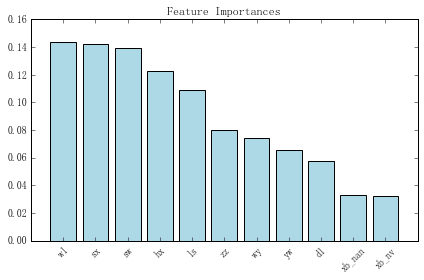

In [121]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 不同分类器决策边界比较（仅取2个特征）

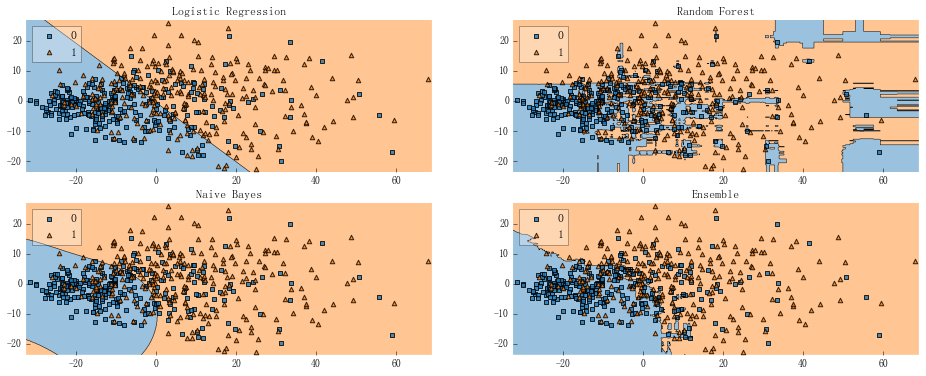

In [122]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=rng)
clf2 = RandomForestClassifier(random_state=rng)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(16, 6))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_pca, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_pca, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## 不同分类器决策边界比较（取多个特征）

In [123]:
from sklearn.decomposition import PCA
def get_pca(X):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_pca = pd.DataFrame(X_pca)
    X_pca.columns = ['pc1', 'pc2']
    return X_pca

def get_data_frame_cartesian_product(df):
    dicts = df.to_dict(orient='list')
    new_list = [list(x) for x in itertools.product(*dicts.values())]
    new_df = pd.DataFrame(new_list, columns=df.columns)
    return new_df
    
def plot_decision_regions2(X, y, clf, cp_flag=False, predict_proba = False):
    
    X = pd.DataFrame(X)


    if cp_flag:
        #根据最大值、最小值生成等距栅格
        fill_ratio = 5 #最大不要超过5
        col = 0
        col_min = np.min(X.iloc[:, col])
        col_max = np.max(X.iloc[:, col])
        X_simulation = [np.linspace(col_min, col_max, fill_ratio)]
        for col in X.columns[1:]:
            col_min = np.min(X.loc[:, col])
            col_max = np.max(X.loc[:, col])
            X_simulation.append(np.linspace(col_min, col_max, fill_ratio))
        X_simulation = pd.DataFrame(X_simulation).T
        X_simulation.columns = X.columns

        #生成笛卡尔积DataFrame
        X_simulation_cartesian_product = get_data_frame_cartesian_product(X_simulation)

        X_train = pd.concat([X, X_simulation_cartesian_product], axis=0)
    else:
        X_train = X
    #在笛卡尔数据框上进行预测
    y_train_pred = clf.predict(X_train)
    
    #笛卡尔数据框的主成分
    X_train_pca = get_pca(X_train) 
    
    #原始数据的主成分
    X_pca = get_pca(X.values) 
    
    #主成分网格坐标
    x_min = np.min(X_pca.loc[:, 'pc1'])
    x_max = np.max(X_pca.loc[:, 'pc1'])
    y_min = np.min(X_pca.loc[:, 'pc2'])
    y_max = np.max(X_pca.loc[:, 'pc2'])
    xnum = 500
    ynum = 500
    dim = 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=xnum),
                         np.linspace(y_min, y_max, num=ynum))
    X_pca_grid = np.array([xx.ravel(), yy.ravel()]).T
    X_test = np.zeros((X_pca_grid.shape[0], dim))
    X_test[:, 0] = X_pca_grid[:, 0]
    X_test[:, 1] = X_pca_grid[:, 1]
    
    #主成分网格相应的预测值——最近邻法
    model = KNeighborsClassifier(n_neighbors=1, weights='uniform')
    model.fit(X_train_pca, y_train_pred)
    if predict_proba:
        y_test_pred = model.predict_proba(X_test)
        y_test_pred = pd.DataFrame(y_test_pred).iloc[:, 1].values
    else:
        y_test_pred = model.predict(X_test)

    Z = y_test_pred.reshape(xx.shape)
    
    #绘制决策边界
    markers = 's^oxv<>'
    colors = ('#1f77b4,#ff7f0e,#3ca02c,#d62728,'
          '#9467bd,#8c564b,#e377c2,'
          '#7f7f7f,#bcbd22,#17becf')
    scatter_kwargs = None
    contourf_kwargs = None
    scatter_highlight_kwargs = None

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]
    #colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    ax = plt.gca()
    contourf_kwargs_default = {'alpha': 0.45, 'antialiased': True}
    cset = ax.contourf(xx, yy, Z,
                   colors=colors,
                   levels=np.arange(Z.max() + 2) - 0.5)

    ax.contour(xx, yy, Z, cset.levels,
           colors='k',
           linewidths=0.5,
           antialiased=True)

    ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
    x_index, y_index = 0, 1
    scatter_kwargs_default = {'alpha': 0.8, 'edgecolor': 'black'}
    scatter_kwargs = format_kwarg_dictionaries(
       default_kwargs=scatter_kwargs_default,
       user_kwargs=scatter_kwargs,
       protected_keys=['c', 'marker', 'label'])
    for idx, c in enumerate(np.unique(y)):
        y_data = X_pca[y == c].iloc[:, y_index]
        x_data = X_pca[y == c].iloc[:, x_index]
        ax.scatter(x=x_data,
               y=y_data,
               c=colors[idx],
               marker=next(marker_gen),
               label=c,
               **scatter_kwargs)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

我们先通过ListedColormap方法定义一些颜色（color）和标记符号（marker），并通过颜色列表生成了颜色示例图。然后对两个特征的最大值、最小值做了限定，使用NumPy的meshgrid函数将最大值、最小值向量生成二维数组xx1和xx2。由于使用了两个特征来训练感知器，因此需要将二维组展开，创建一个与鸢尾花数据训练数据集中列数相同的矩阵，以预测多维数组中所有对应点的类标z。将z变换为与xx1和xx2相同的维度后，我们就可以使用matplotlib中的contourf函数，对于网格数组中每个预测的类以不同的颜色绘制出预测得到的决策区域。

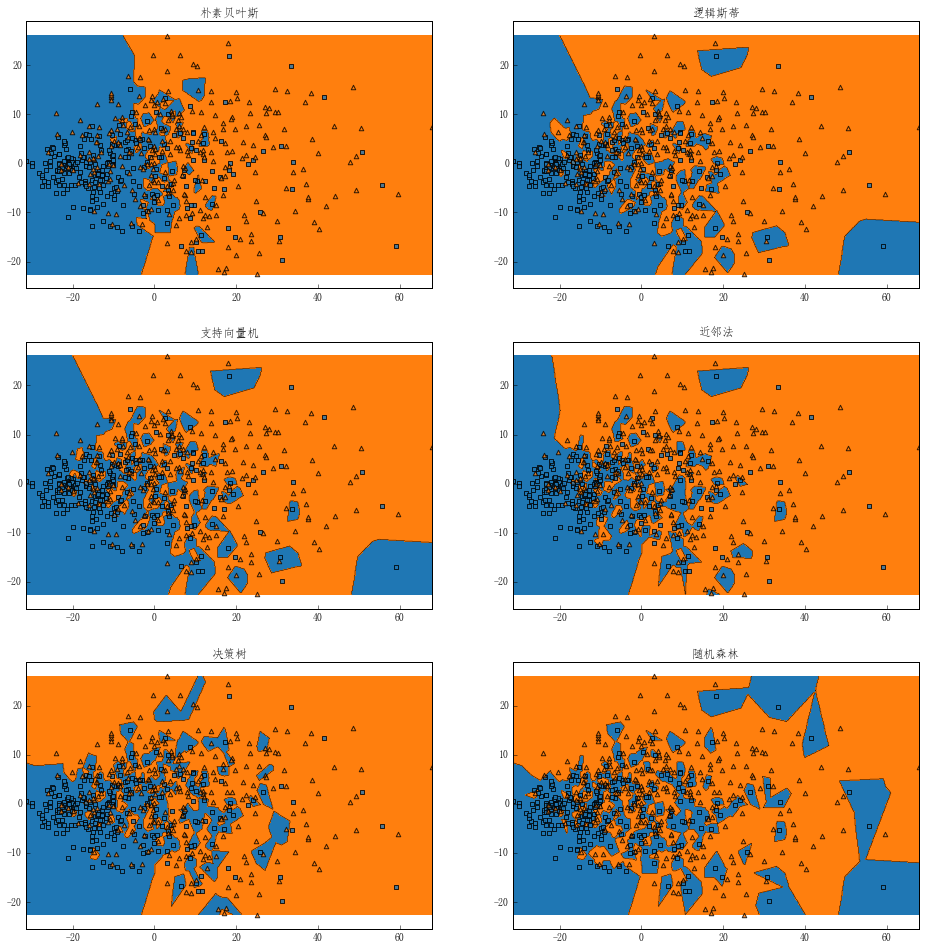

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing Classifiers
clf1 = GaussianNB()
clf2 = LogisticRegression(C=100.0, random_state=rng)
clf3 = SVC(kernel='linear', C=1.0, random_state=rng, probability=True)
clf4 = KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski')
clf5 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
clf6 = RandomForestClassifier(criterion='gini',
                                n_estimators=5000, 
                                random_state=rng,
                                n_jobs=2)

# Plotting Decision Regions
gs = gridspec.GridSpec(4, 2)
fig = plt.figure(figsize=(16, 22))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         ['朴素贝叶斯', '逻辑斯蒂', '支持向量机', '近邻法', '决策树', '随机森林'],
                         itertools.product([0, 1, 2], [0, 1])):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions2(X=X_train.values, y=y_train, 
                                clf=clf)
    plt.title(lab)
plt.show()

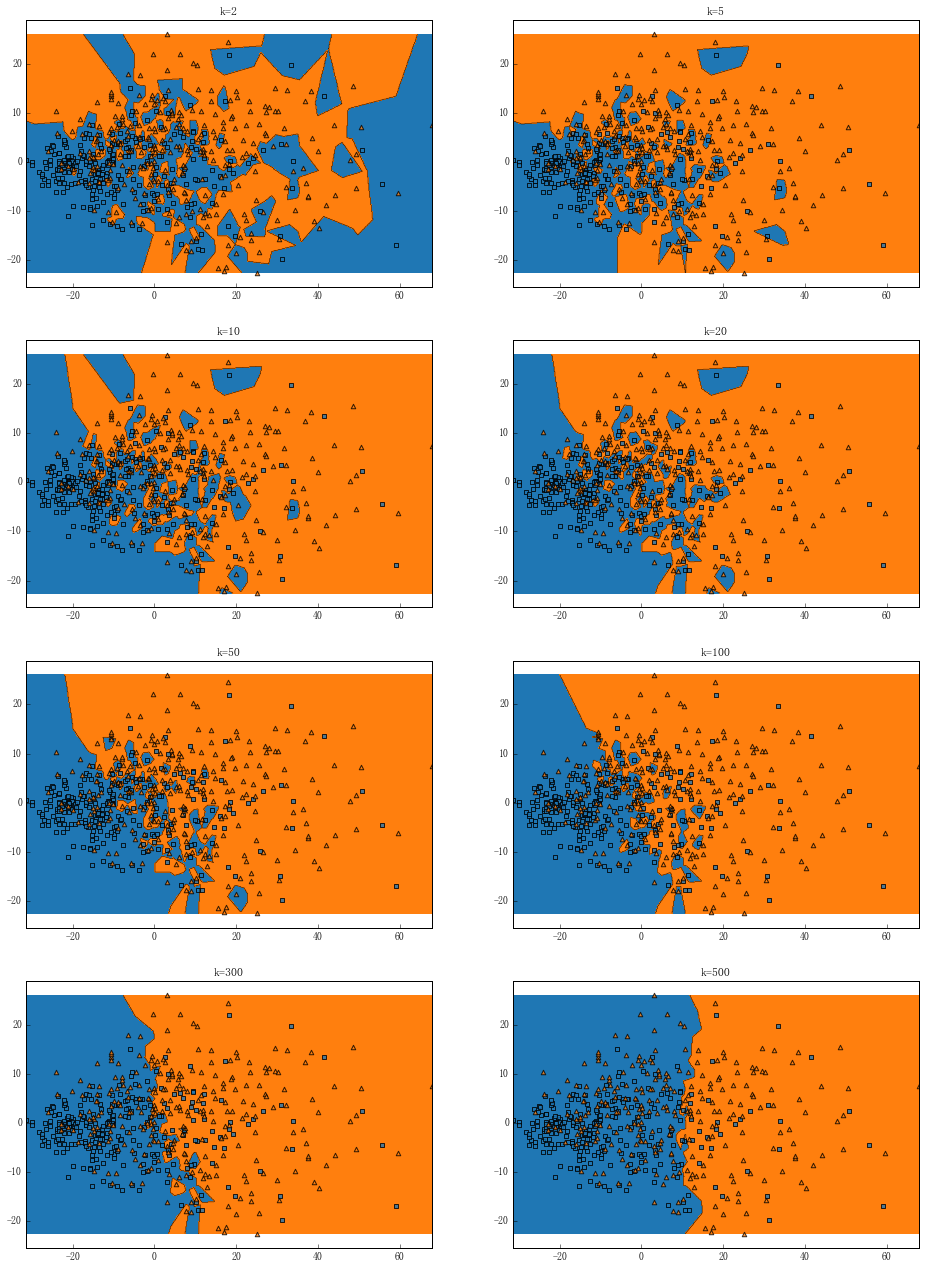

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.tree import DecisionTreeClassifier

# Initializing Classifiers
ks = [2, 5, 10, 20, 50, 100, 300, 500]
clf_names = ['clf'+str(idx) for idx in range(len(ks))]

createVar = locals() #注意，此处用到了动态生成变量的技巧clf0~clf7，否则就得把语句重复写7遍了
for idx, val in enumerate(ks):
    createVar['clf'+str(idx)] = KNeighborsClassifier(n_neighbors=val, 
                           p=2, 
                           metric='minkowski')
clf_names = ['clf'+str(idx) for idx in range(len(ks))]
# Plotting Decision Regions
gs = gridspec.GridSpec(4, 2)
fig = plt.figure(figsize=(16, 22))

for clf, lab, grd in zip([eval(clf_name) for clf_name in clf_names],
                         ['k='+str(k) for k in ks],
                         itertools.product([0, 1, 2, 3], [0, 1])):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions2(X=X_train.values, y=y_train, 
                                clf=clf)
    plt.title(lab)
plt.show()

# 讨论

若将本实验的问题情境转换成关联关系的发现，是否可行？有何异同？

<!--NAVIGATION-->
<[MovieLens电影推荐](ch04_MovieLens电影推荐.ipynb) | [Contents](Index.ipynb) | [藻类数量预测](ch06_藻类数量预测.ipynb) >